# Data exploration of the HDFS system

## 1. Importing relevant stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the datasets ['anomaly_label.csv','Event_occurrence_matrix.csv','Event_traces.csv','HDFS.log_templates.csv']
# into a list and initalising the files as dataframes

files = ['anomaly_label.csv','Event_occurrence_matrix.csv','Event_traces.csv','HDFS.log_templates.csv']

pandas_list = []

for file in files:
    pandas_list.append(pd.read_csv(file))

## 2. Exploring dataset and the relevant relations

#### 2.1 Check for Null values in dataset

In [3]:
for co in range(len(files)):
    print('Null Values for',files[co],':')
    print(pandas_list[co].isna().sum())


Null Values for anomaly_label.csv :
BlockId    0
Label      0
dtype: int64
Null Values for Event_occurrence_matrix.csv :
BlockId         0
Label           0
Type       558223
E1              0
E2              0
E3              0
E4              0
E5              0
E6              0
E7              0
E8              0
E9              0
E10             0
E11             0
E12             0
E13             0
E14             0
E15             0
E16             0
E17             0
E18             0
E19             0
E20             0
E21             0
E22             0
E23             0
E24             0
E25             0
E26             0
E27             0
E28             0
E29             0
dtype: int64
Null Values for Event_traces.csv :
BlockId              0
Label                0
Type            558223
Features             0
TimeInterval         0
Latency              0
dtype: int64
Null Values for HDFS.log_templates.csv :
EventId          0
EventTemplate    0
dtype: int64


#### 2.2 Dataset headers and shape

In [4]:
for co in range(len(files)):
    print('Dataframe size of',files[co],':')
    print(pandas_list[co].shape)

Dataframe size of anomaly_label.csv :
(575061, 2)
Dataframe size of Event_occurrence_matrix.csv :
(575061, 32)
Dataframe size of Event_traces.csv :
(575061, 6)
Dataframe size of HDFS.log_templates.csv :
(29, 2)


In [5]:
for co in range(len(files)):
    print(co,'Dataframe info of',files[co],':',end='\n\n')
    print(pandas_list[co].info(),end='\n\n')

0 Dataframe info of anomaly_label.csv :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575061 entries, 0 to 575060
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   BlockId  575061 non-null  object
 1   Label    575061 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB
None

1 Dataframe info of Event_occurrence_matrix.csv :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575061 entries, 0 to 575060
Data columns (total 32 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   BlockId  575061 non-null  object 
 1   Label    575061 non-null  object 
 2   Type     16838 non-null   float64
 3   E1       575061 non-null  int64  
 4   E2       575061 non-null  int64  
 5   E3       575061 non-null  int64  
 6   E4       575061 non-null  int64  
 7   E5       575061 non-null  int64  
 8   E6       575061 non-null  int64  
 9   E7       575061 non-null  int64  
 10  E8       575061 

In [6]:
for co in range(len(files)):
    print('Describing dataframe',files[co],':',end='\n\n')
    print(pandas_list[co].describe(),end='\n\n')

Describing dataframe anomaly_label.csv :

                         BlockId   Label
count                     575061  575061
unique                    575061       2
top     blk_-9128742458709757181  Normal
freq                           1  558223

Describing dataframe Event_occurrence_matrix.csv :

               Type             E1             E2             E3  \
count  16838.000000  575061.000000  575061.000000  575061.000000   
mean       9.375638       0.000017       0.208736       0.745531   
std       11.344260       0.005897       0.580644       2.517178   
min        0.000000       0.000000       0.000000       0.000000   
25%        3.000000       0.000000       0.000000       0.000000   
50%        5.000000       0.000000       0.000000       0.000000   
75%        8.000000       0.000000       0.000000       0.000000   
max       31.000000       2.000000       4.000000     203.000000   

                  E4             E5             E6             E7  \
count  575061.0000

In [7]:
for co in range(len(files)):
    print(co,'Dataframe head of',files[co],':',end='\n\n')
    print(pandas_list[co].head(),end='\n\n')

0 Dataframe head of anomaly_label.csv :

                    BlockId    Label
0  blk_-1608999687919862906   Normal
1   blk_7503483334202473044   Normal
2  blk_-3544583377289625738  Anomaly
3  blk_-9073992586687739851   Normal
4   blk_7854771516489510256   Normal

1 Dataframe head of Event_occurrence_matrix.csv :

                    BlockId    Label  Type  E1  E2   E3  E4  E5  E6  E7  ...  \
0  blk_-1608999687919862906  Success   NaN   0   0  203   0  10   7   0  ...   
1   blk_7503483334202473044  Success   NaN   0   2    1   0   3   0   0  ...   
2  blk_-3544583377289625738     Fail  21.0   0   0  203   0   3   0   0  ...   
3  blk_-9073992586687739851  Success   NaN   0   3    0   0   3   0   0  ...   
4   blk_7854771516489510256  Success   NaN   0   3    1  15   3   0   0  ...   

   E20  E21  E22  E23  E24  E25  E26  E27  E28  E29  
0    0   10    1   10    0    4   10    0    0    0  
1    0    3    1    3    0    0    3    0    0    0  
2    1    3    1    3    0    0    3    0 

## 2.3 Isolating one of the Dataframes to be reviewed and explored

After reviewing the dataset and the other rows and columns in the dataset, we have determined that the use of the dataset Event_occurrence_matrix.csv is the most practical use since it contains the count of each event. It splits the event into individual columns that are numerical in nature. This does not mean that the other datasets will be used, but it means that this is the primary focus of this training

In [8]:
# Initalinsing the pandas list to another variable called occ_df
occ_df = pandas_list[1]

In [9]:
# Since the anomoly_label.csv is provided as a csv with corresponding block ids, lets join them both
# Since the Latency column is in another site, lets merge it together with the colum

occ_df = pd.merge(occ_df, pandas_list[0], on='BlockId', how='inner')
occ_df = pd.merge(occ_df, pandas_list[2][['BlockId','Latency']], on='BlockId',how='inner')

# Looking at the first three entries to get an idea of the dataframe
occ_df.head()

,BlockId,Label_x,Type,E1,E2,E3,E4,E5,E6,E7,...,E22,E23,E24,E25,E26,E27,E28,E29,Label_y,Latency
0,blk_-1608999687919862906,Success,NaN,0,0,203,0,10,7,0,...,1,10,0,4,10,0,0,0,Normal,3802
1,blk_7503483334202473044,Success,NaN,0,2,1,0,3,0,0,...,1,3,0,0,3,0,0,0,Normal,3802
2,blk_-3544583377289625738,Fail,21.0,0,0,203,0,3,0,0,...,1,3,0,0,3,0,0,0,Anomaly,3797
3,blk_-9073992586687739851,Success,NaN,0,3,0,0,3,0,0,...,1,3,0,0,3,0,0,0,Normal,50448
4,blk_7854771516489510256,Success,NaN,0,3,1,15,3,0,0,...,1,3,0,0,3,0,0,0,Normal,50583


In [10]:
# Explore the Type column as well as Label_x and Label_y

for col in ['Label_x','Label_y','Type']:
    print('Number of unique values and counts of the values for',col,':')
    print('Unique:',occ_df[col].nunique())
    print('Counts for',occ_df[col].value_counts(),end='\n\n')

Number of unique values and counts of the values for Label_x :
Unique: 2
Counts for Label_x
Success    558223
Fail        16838
Name: count, dtype: int64

Number of unique values and counts of the values for Label_y :
Unique: 2
Counts for Label_y
Normal     558223
Anomaly     16838
Name: count, dtype: int64

Number of unique values and counts of the values for Type :
Unique: 26
Counts for Type
5.0     4167
31.0    3225
3.0     2950
0.0     2809
4.0     1240
1.0      953
21.0     724
7.0      476
12.0     130
8.0       45
9.0       34
16.0      22
13.0      10
22.0       9
18.0       9
19.0       8
20.0       7
27.0       3
10.0       3
24.0       3
11.0       3
17.0       3
25.0       2
28.0       1
23.0       1
30.0       1
Name: count, dtype: int64



Since the values for Type do not have any significance to the dataset, we can drop this column which contains a lot of nan variables. In addition, we can also sort the label_x and label_y columns to 0 and 1, where 0 is success or normal and 1 is fail or anomaly.

The columns for Label_x and Label_y might be the same since they have the number of successes and failures correspond the to the number of normal and anomaly numbers.

In [11]:
occ_df = occ_df.drop(['Type'],axis=1) # Dropping the column Type

# Mapping values to be binary
occ_df.Label_x = occ_df.Label_x.map({'Success':0, 'Fail':1})
occ_df.Label_y = occ_df['Label_y'].map({'Normal':0, 'Anomaly':1})

occ_df.head()

,BlockId,Label_x,E1,E2,E3,E4,E5,E6,E7,E8,...,E22,E23,E24,E25,E26,E27,E28,E29,Label_y,Latency
0,blk_-1608999687919862906,0,0,0,203,0,10,7,0,0,...,1,10,0,4,10,0,0,0,0,3802
1,blk_7503483334202473044,0,0,2,1,0,3,0,0,0,...,1,3,0,0,3,0,0,0,0,3802
2,blk_-3544583377289625738,1,0,0,203,0,3,0,0,0,...,1,3,0,0,3,0,0,0,1,3797
3,blk_-9073992586687739851,0,0,3,0,0,3,0,0,0,...,1,3,0,0,3,0,0,0,0,50448
4,blk_7854771516489510256,0,0,3,1,15,3,0,0,0,...,1,3,0,0,3,0,0,0,0,50583


In [12]:
print(occ_df.Label_x.eq(occ_df.Label_y).unique())

[ True]


In [13]:
# Since both columns are actually the same, we can go ahead and drop the column label_y

occ_df = occ_df.drop(['Label_y'], axis=1)

## 2.4 Exploring the data in the frame

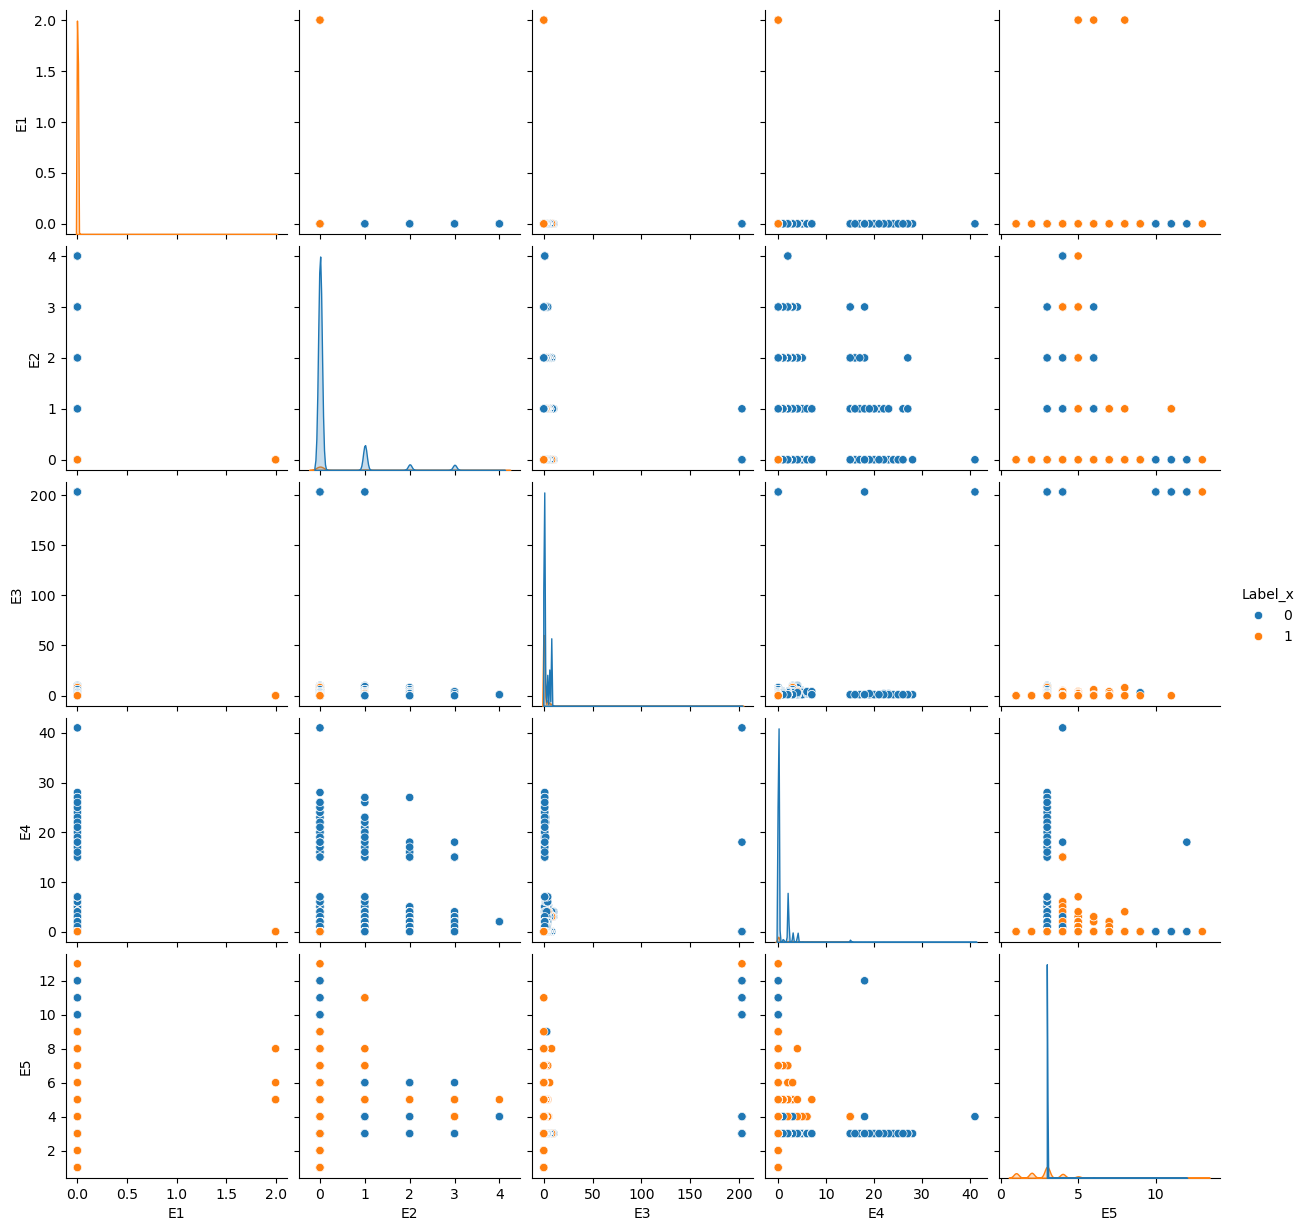

In [14]:
sns.pairplot(occ_df[['E1', 'E2', 'E3', 'E4', 'E5', 'Label_x']], hue='Label_x')
plt.show()

In [15]:
# Initalising occ_corr to reduce workload when correlation table is needed again
occ_corr = occ_df.corr(numeric_only=True)

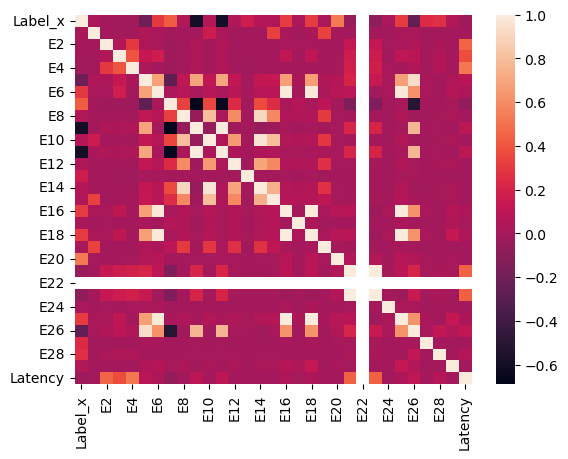

In [16]:
sns.heatmap(occ_corr)
plt.show()

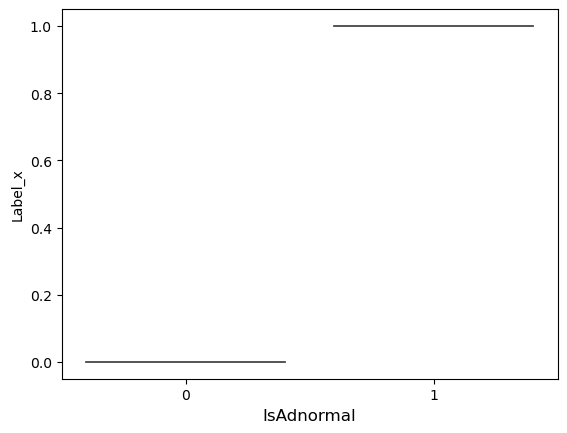

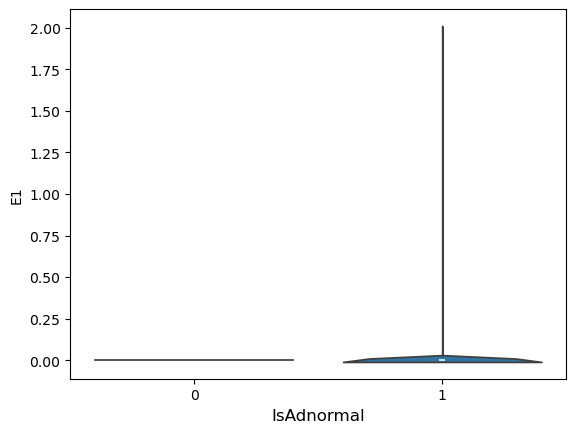

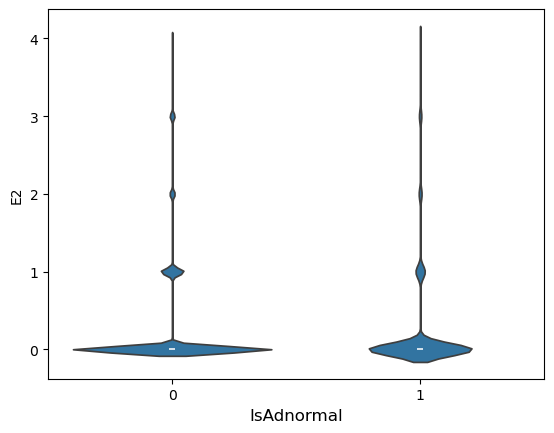

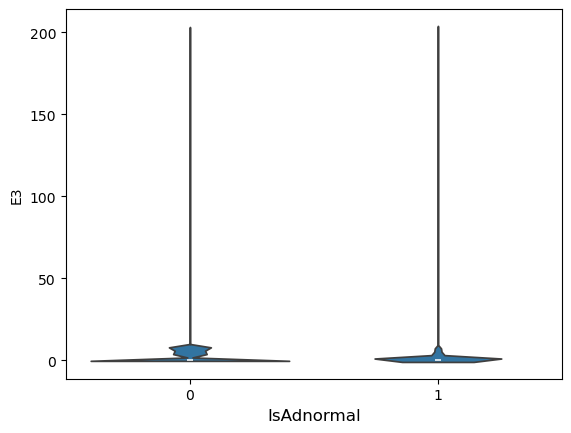

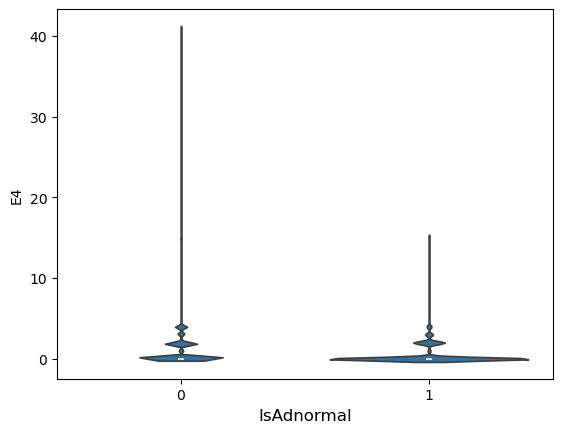

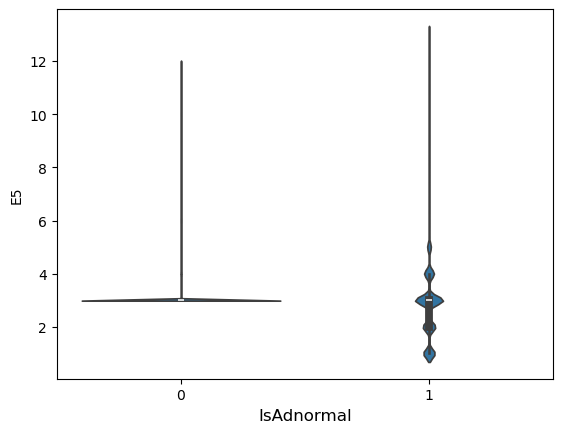

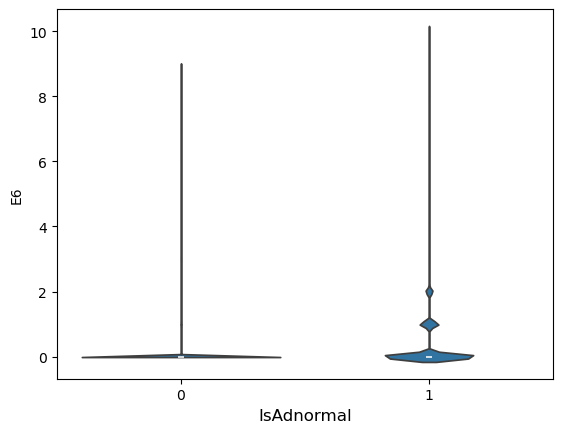

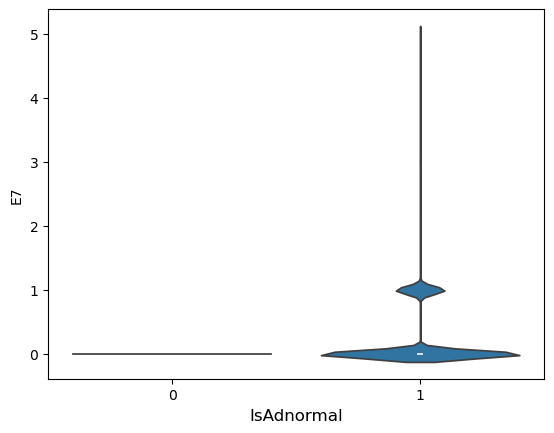

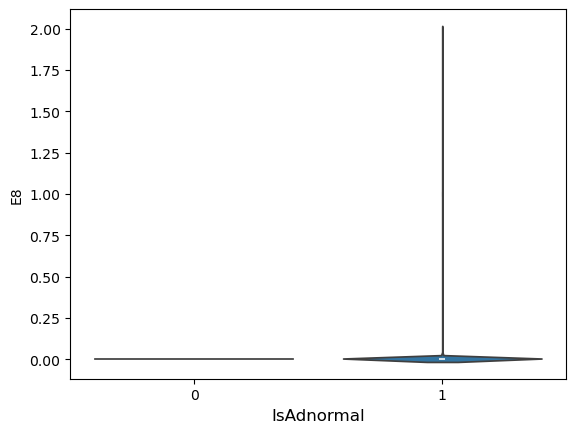

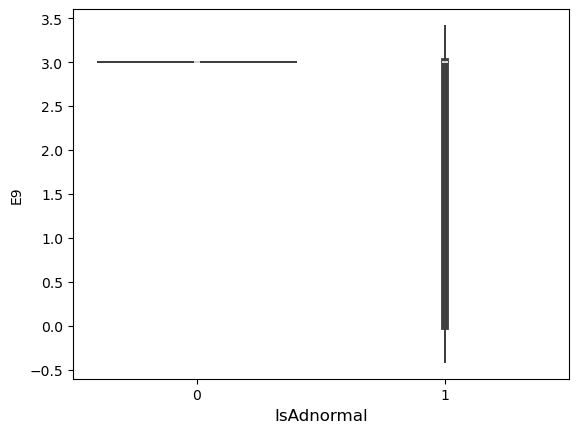

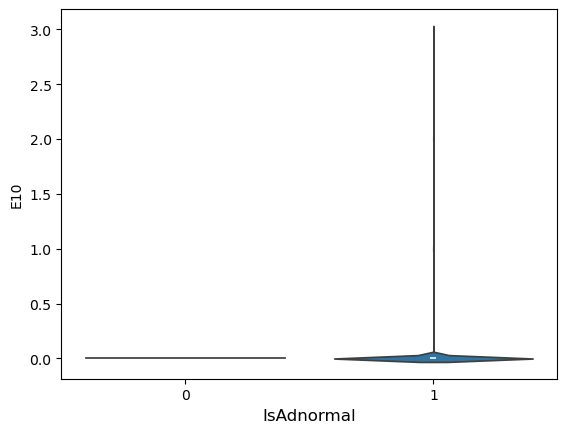

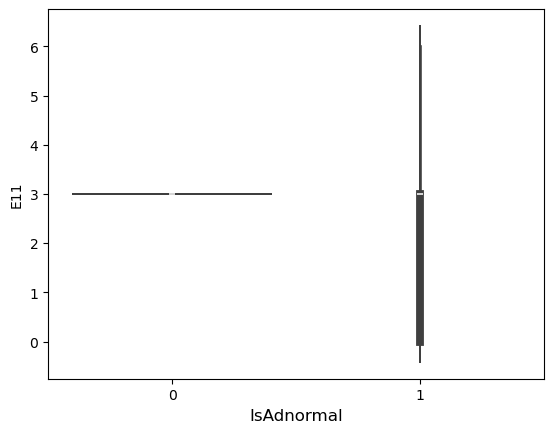

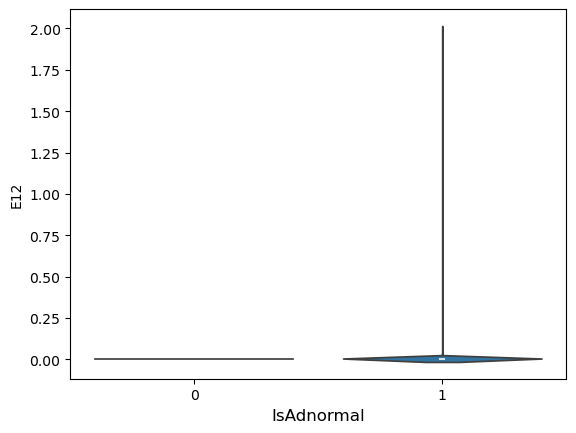

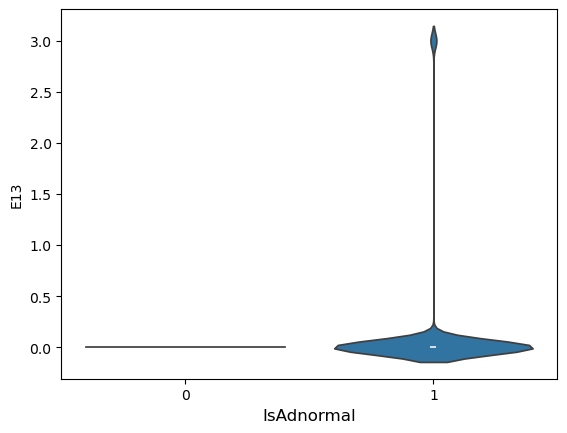

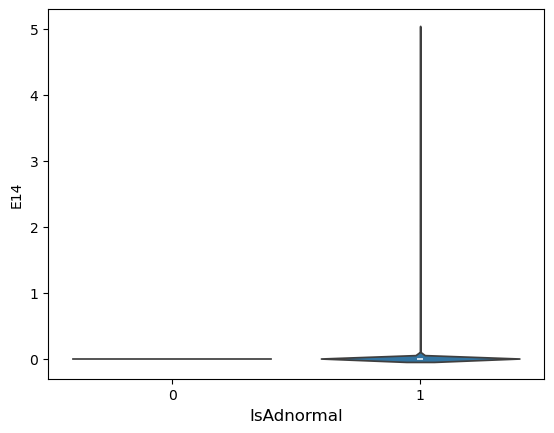

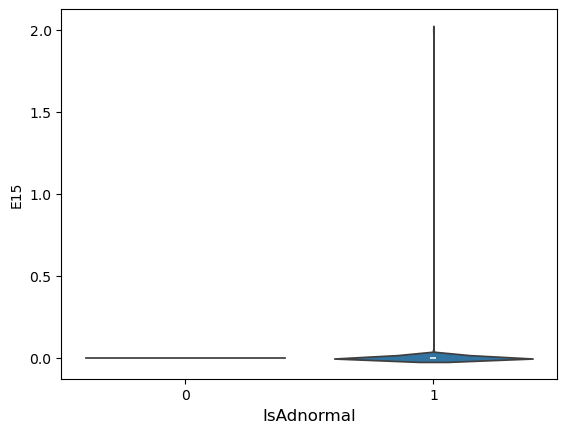

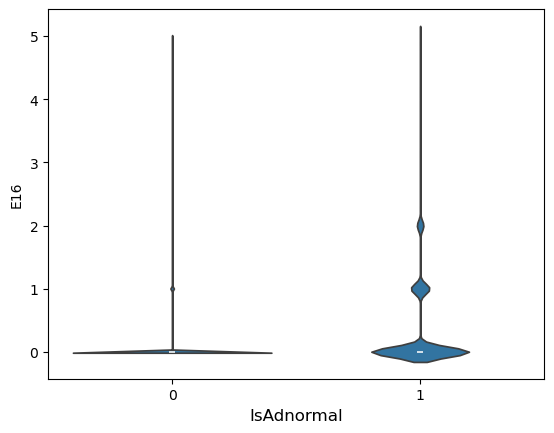

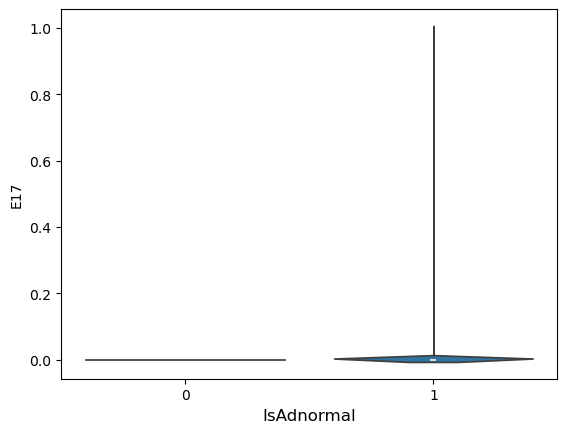

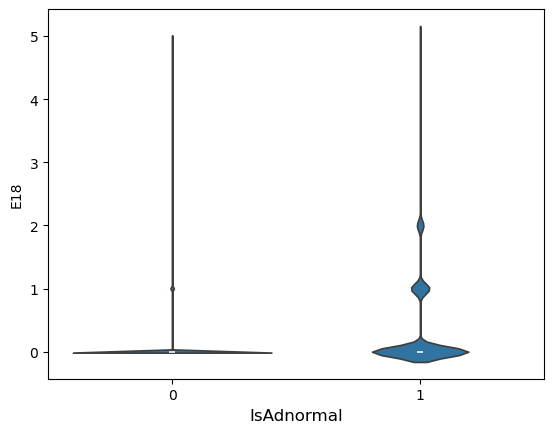

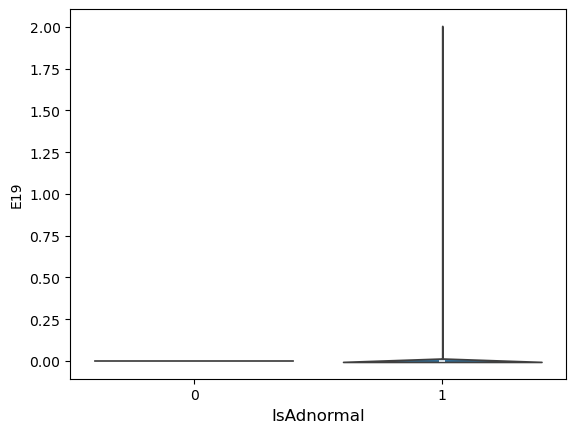

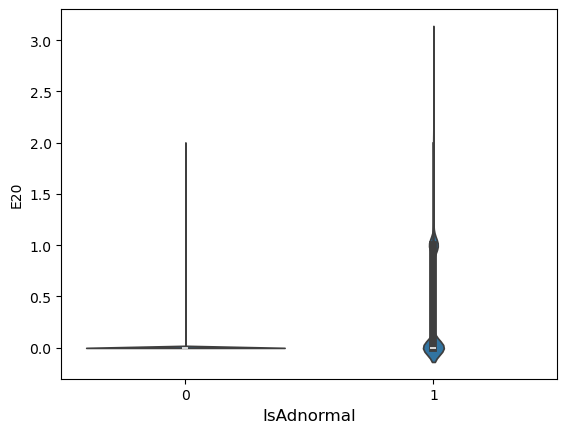

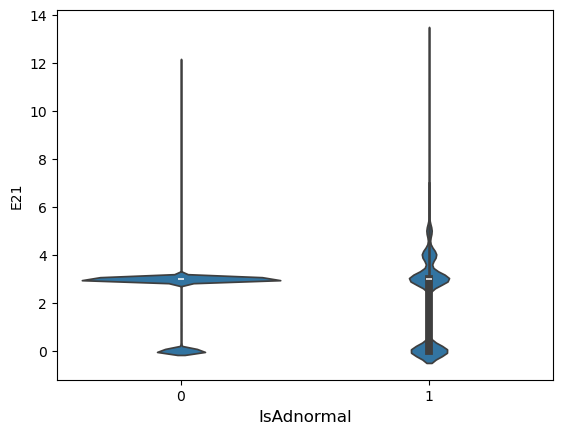

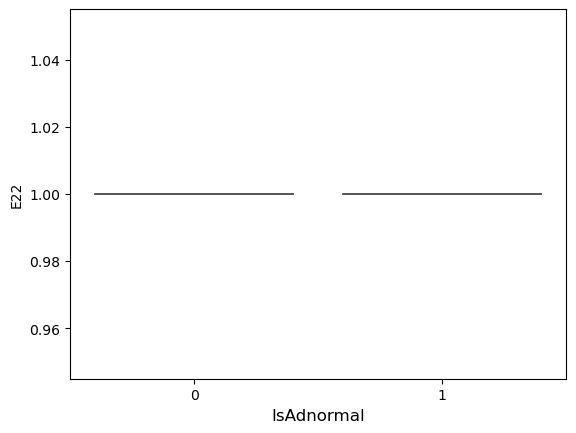

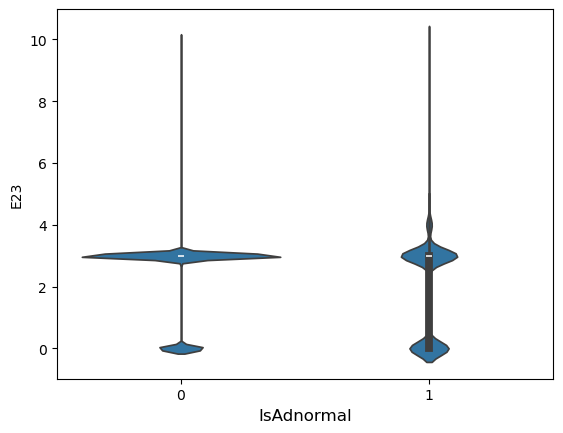

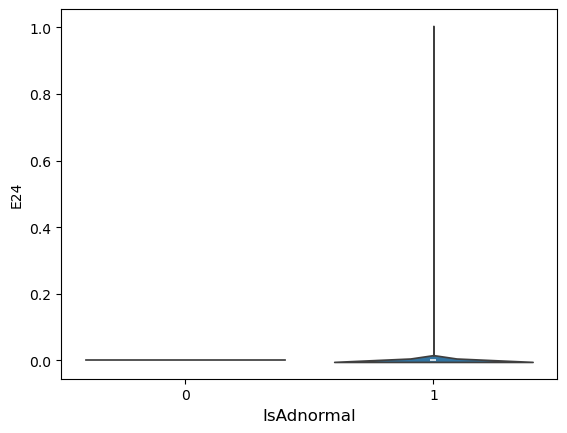

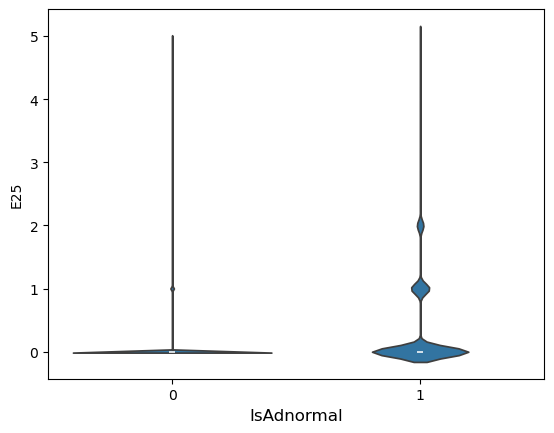

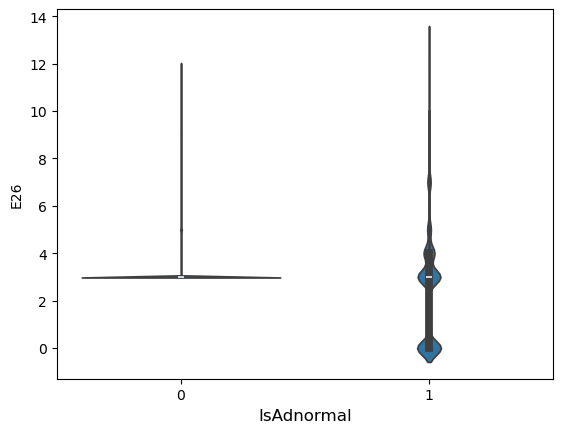

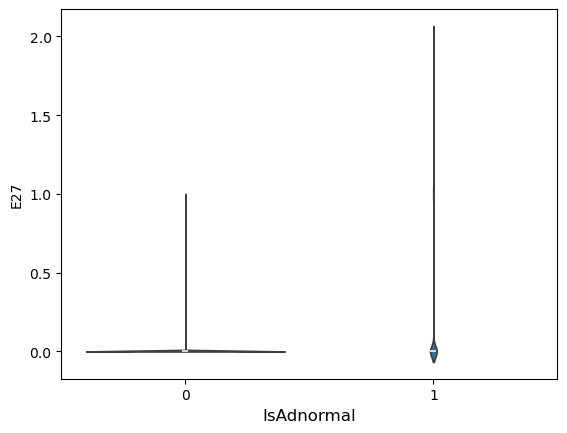

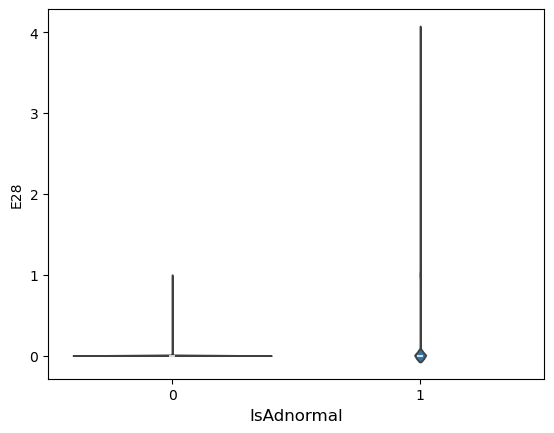

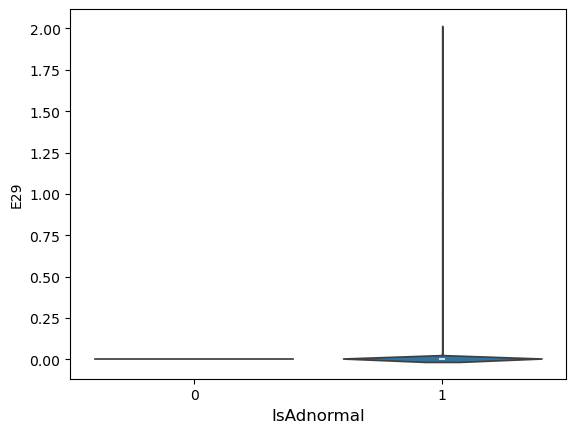

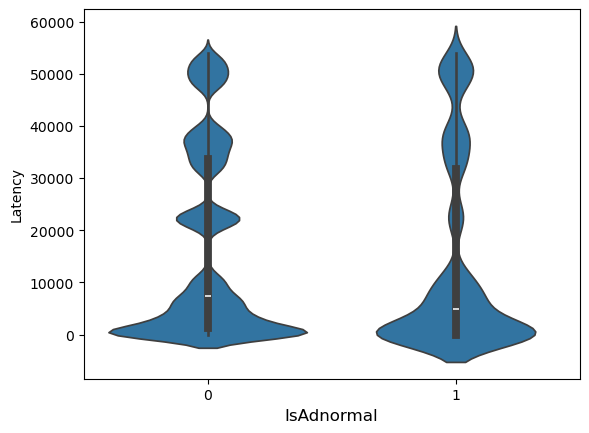

In [17]:
# Performing a violin plot for the labels

v = occ_df.drop(['BlockId'], axis=1)

for col in v.columns:
    sns.violinplot(data=v,x='Label_x',y=col)
    plt.xlabel( "IsAdnormal" , size = 12 )
    plt.show()

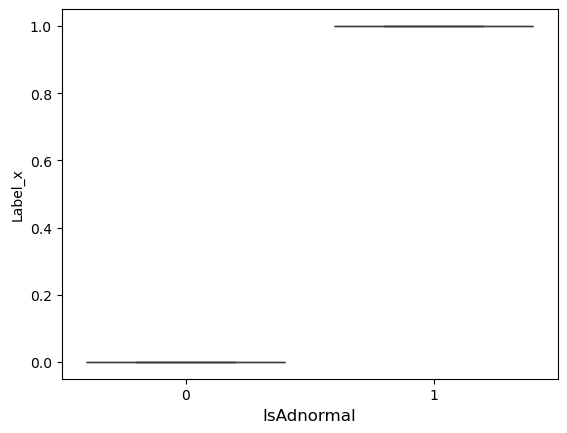

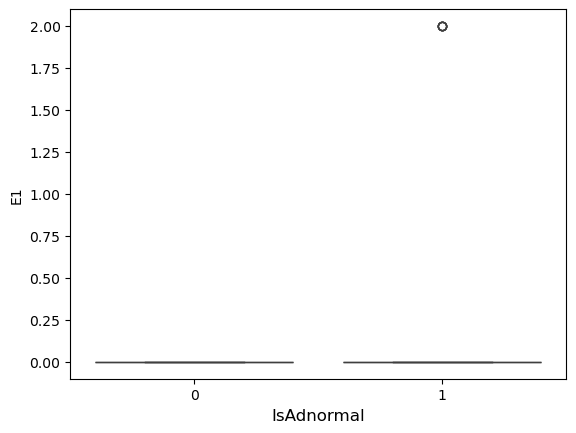

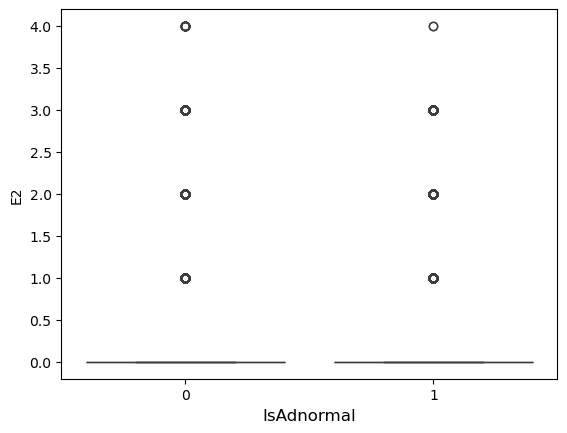

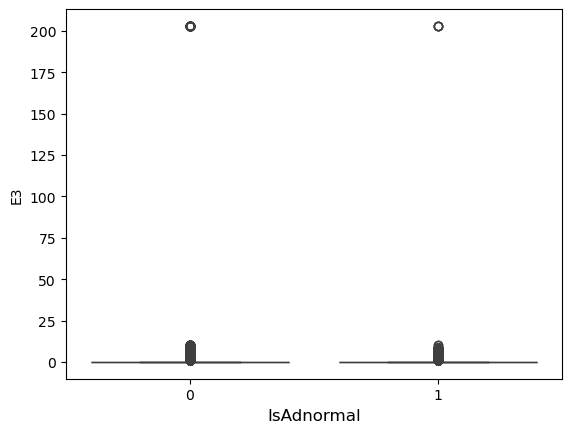

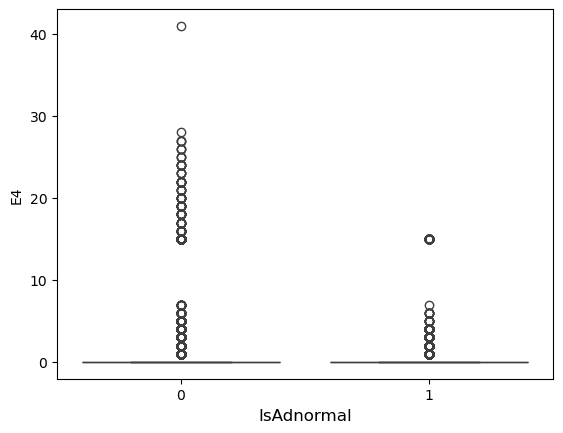

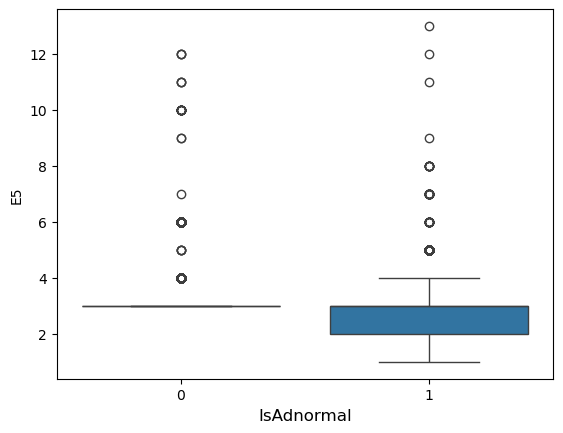

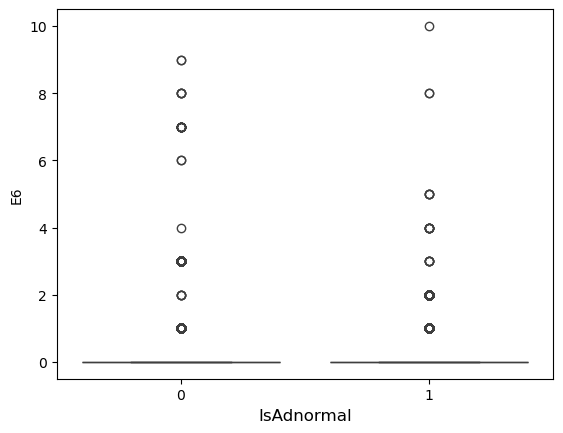

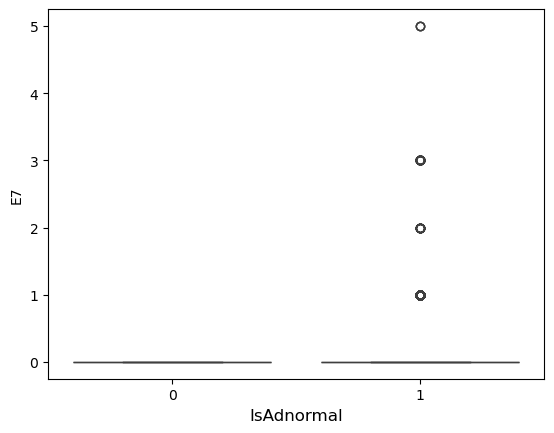

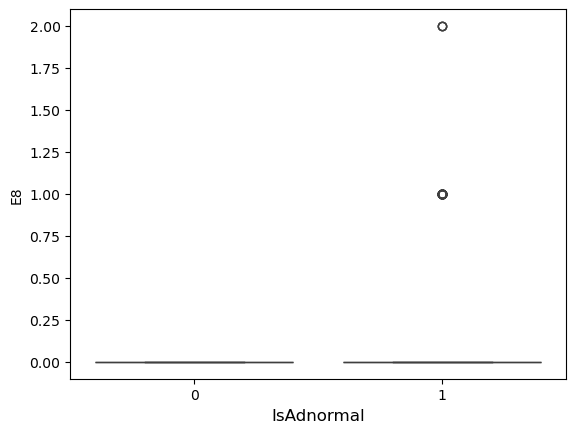

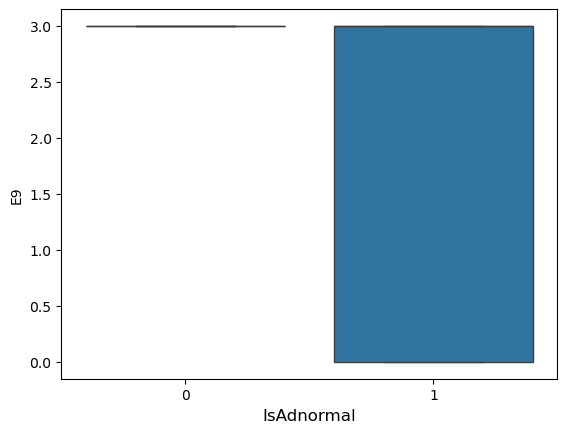

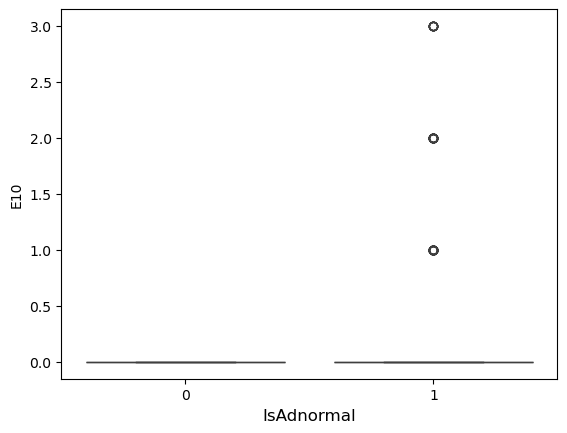

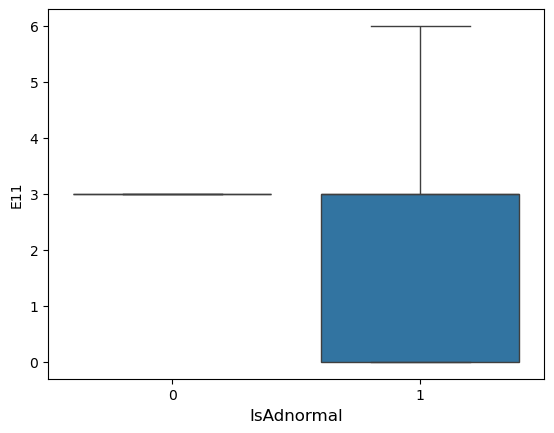

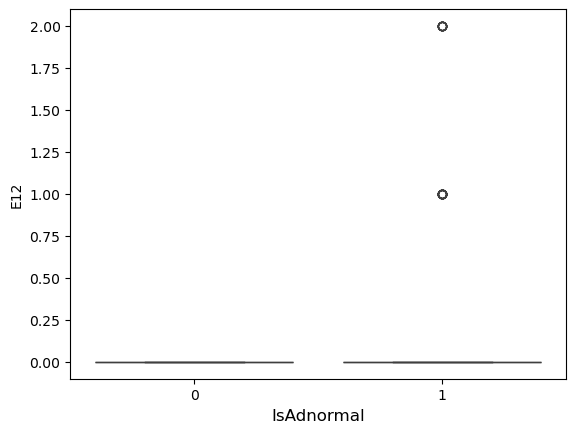

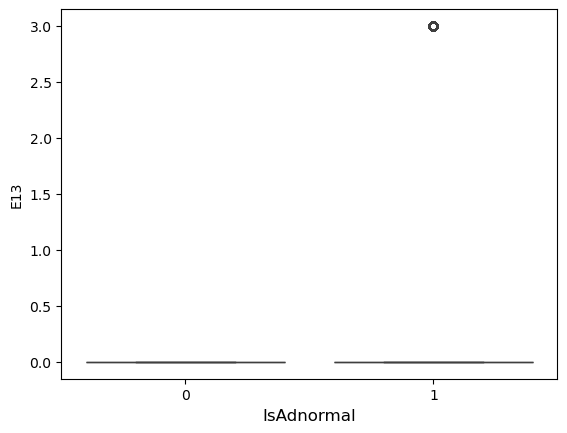

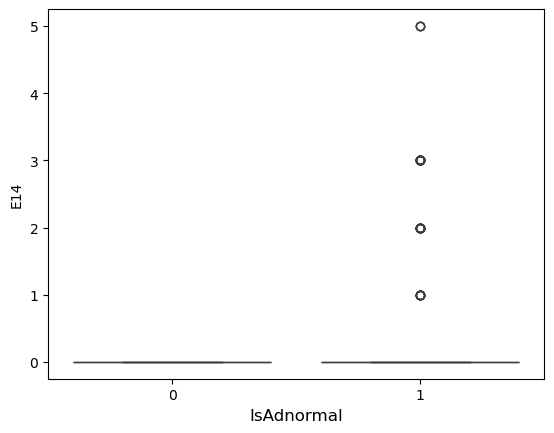

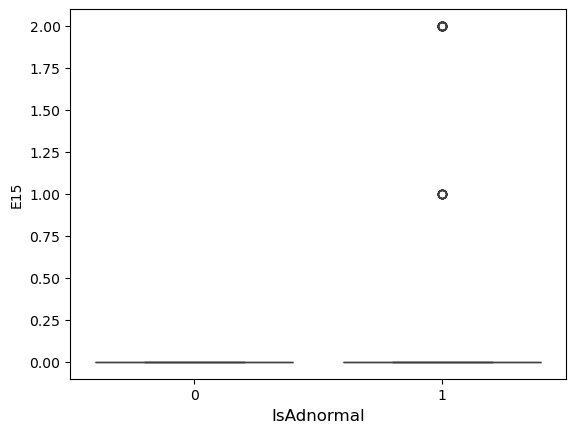

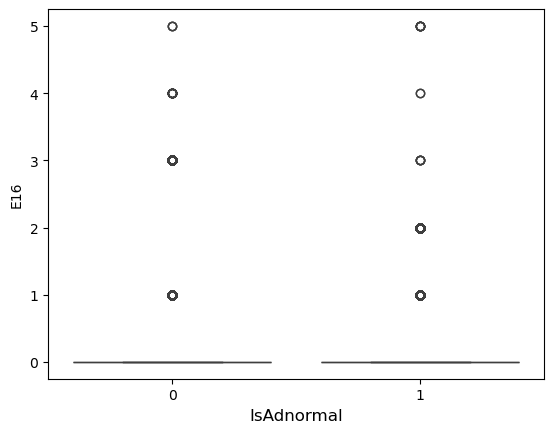

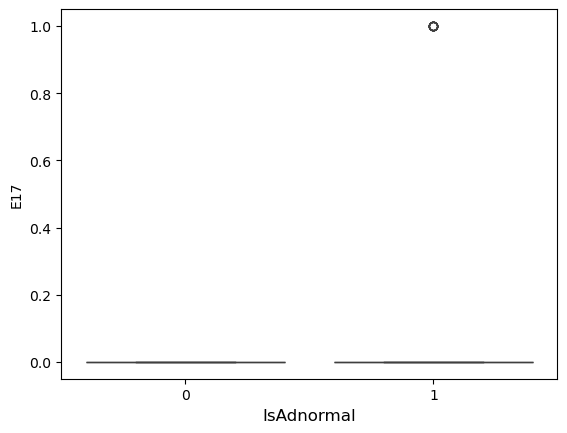

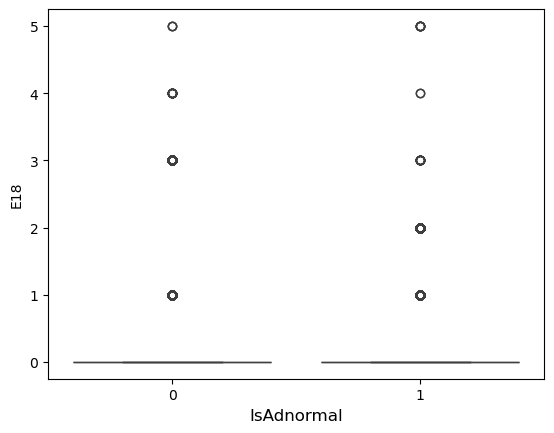

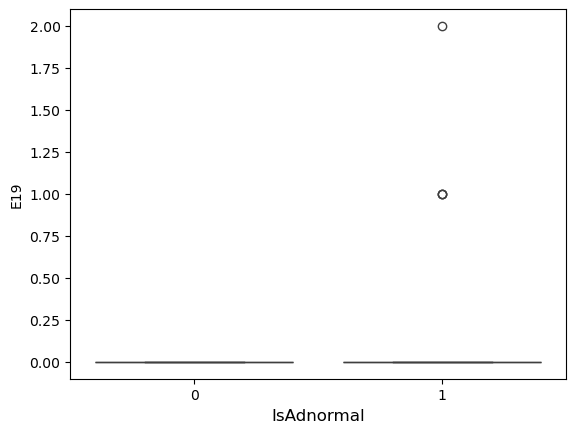

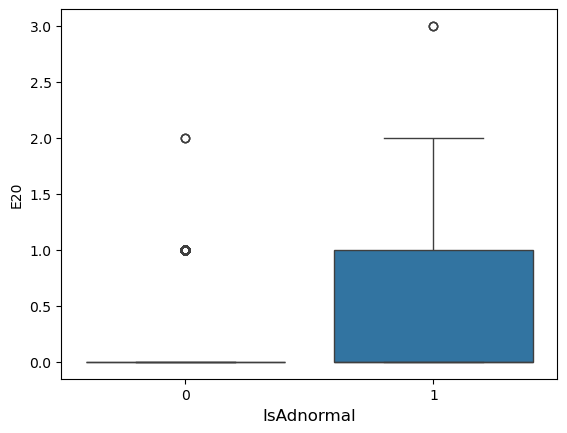

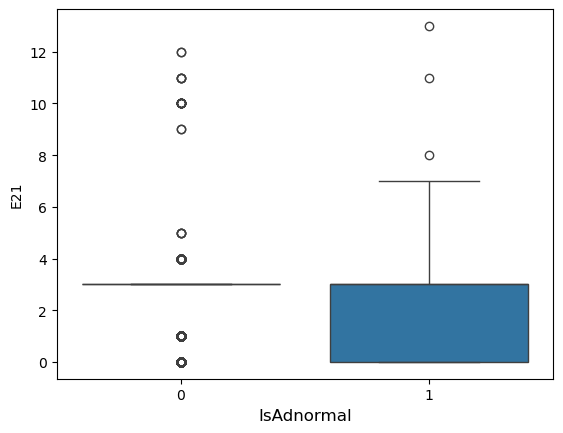

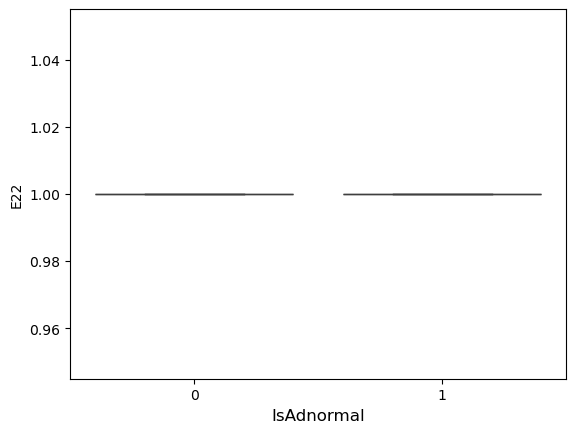

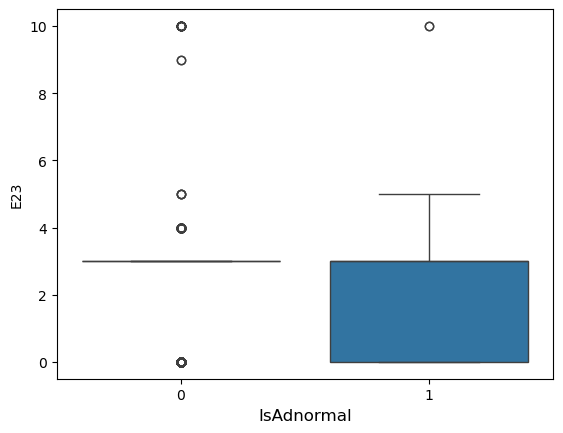

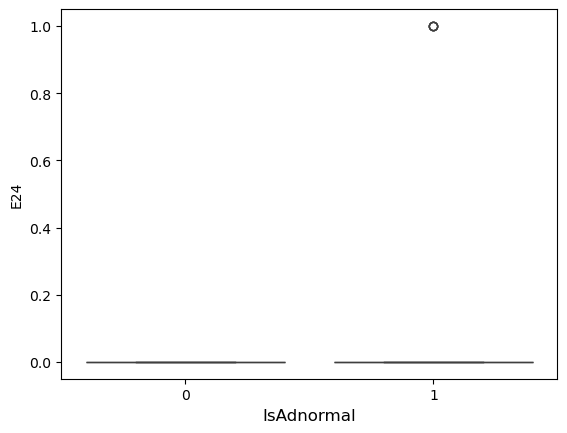

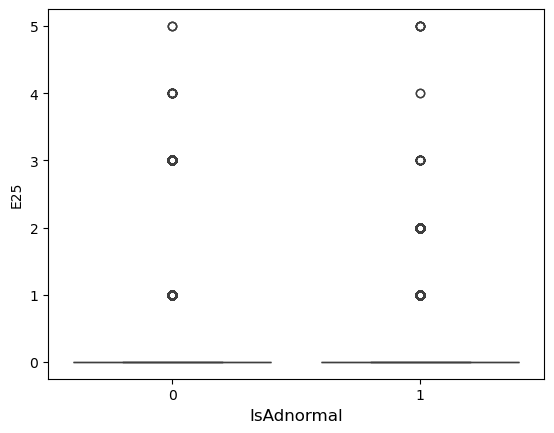

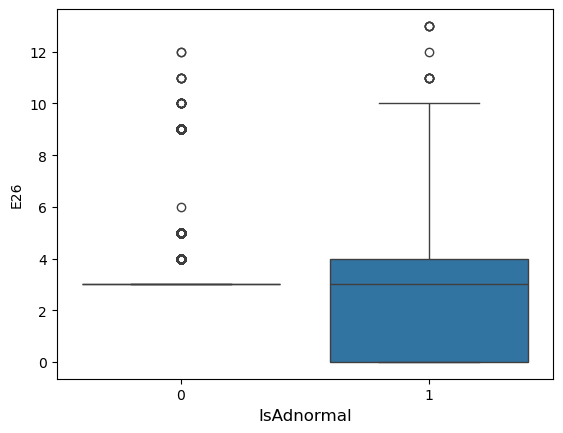

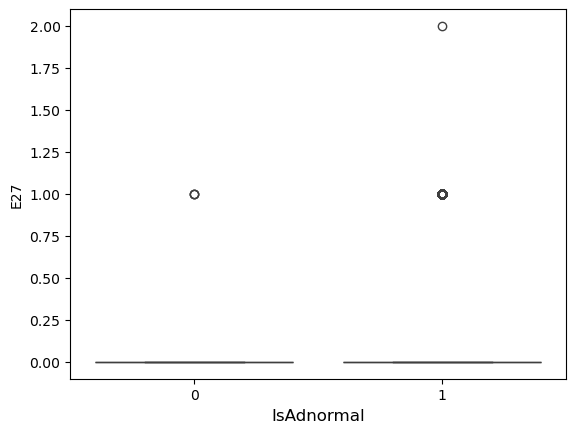

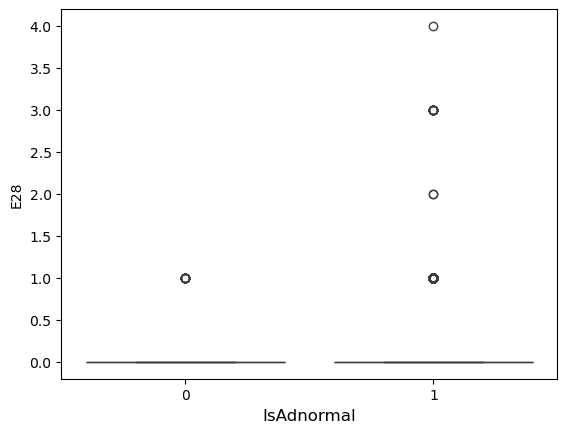

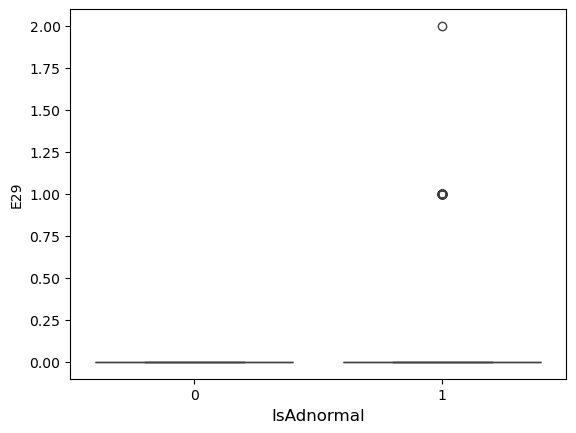

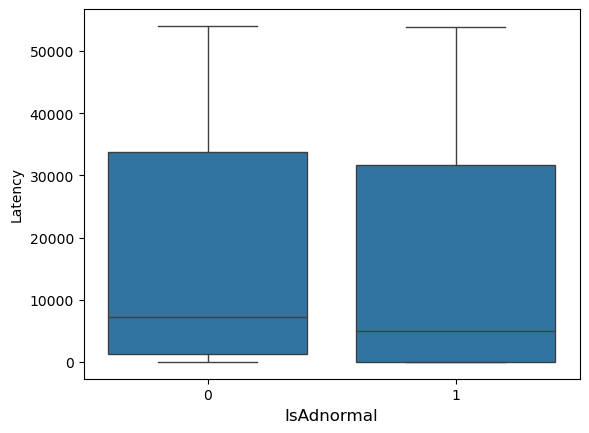

In [18]:
# Boxplot of the dataset

for col in v.columns:
    sns.boxplot(data=v,x='Label_x',y=col)
    plt.xlabel( "IsAdnormal" , size = 12 )
    plt.show()

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


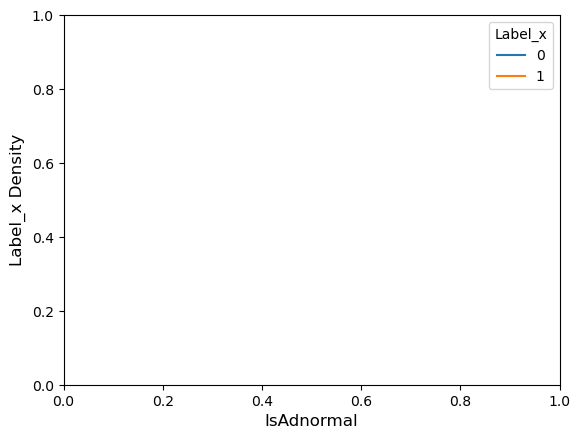

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


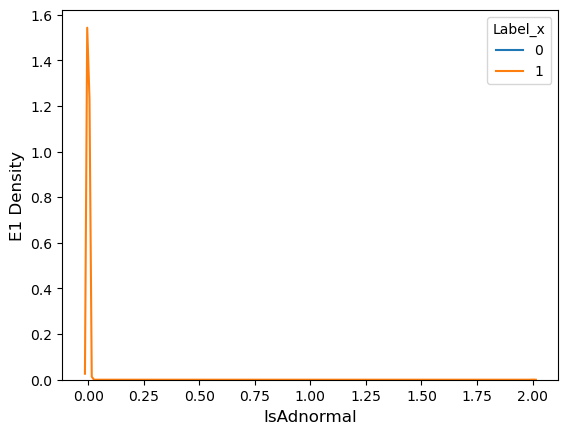

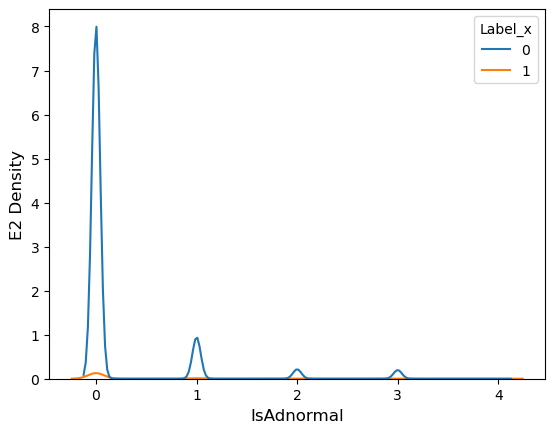

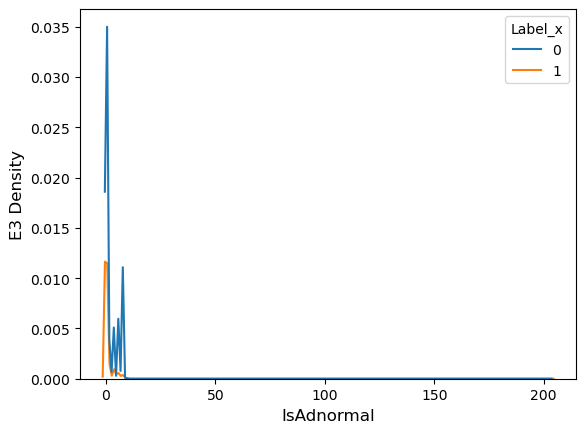

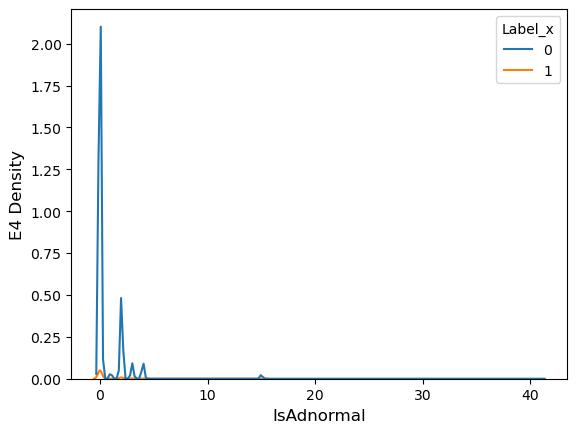

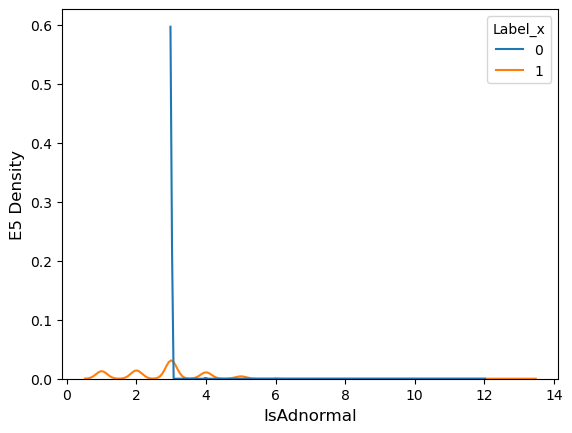

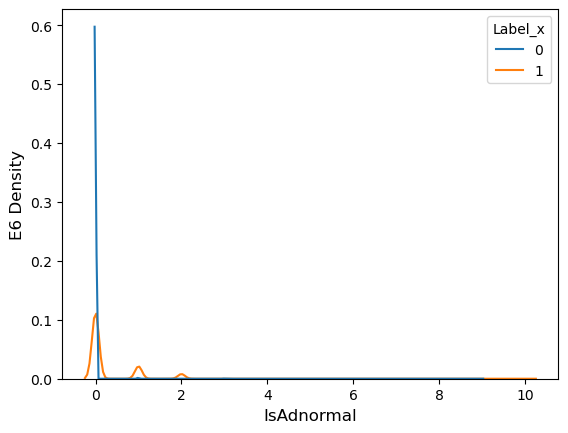

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


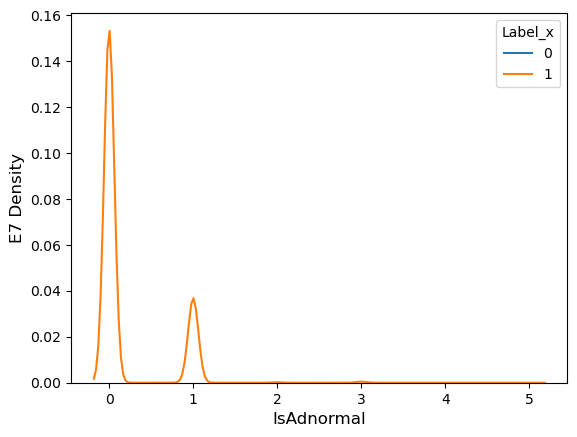

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


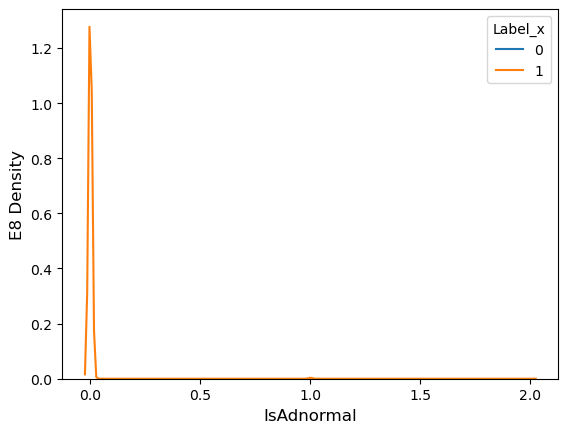

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


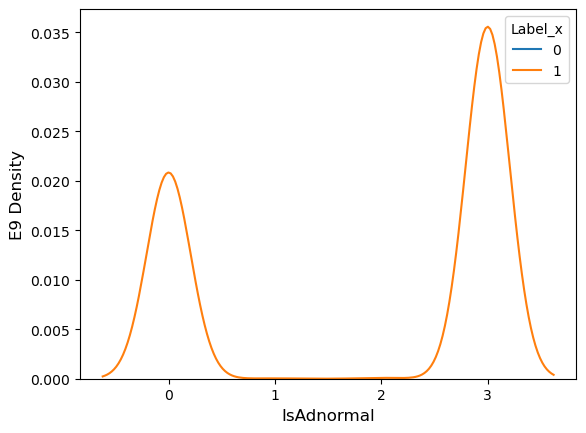

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


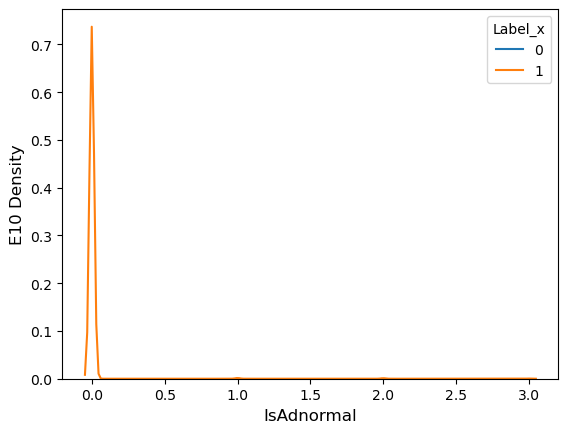

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


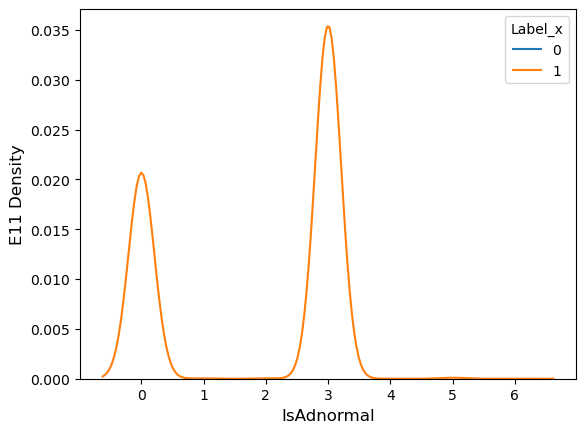

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


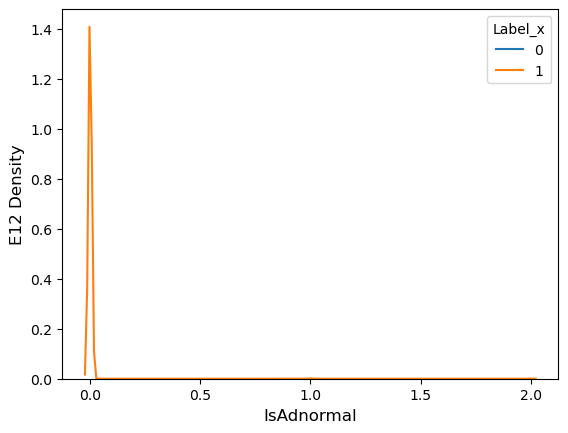

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


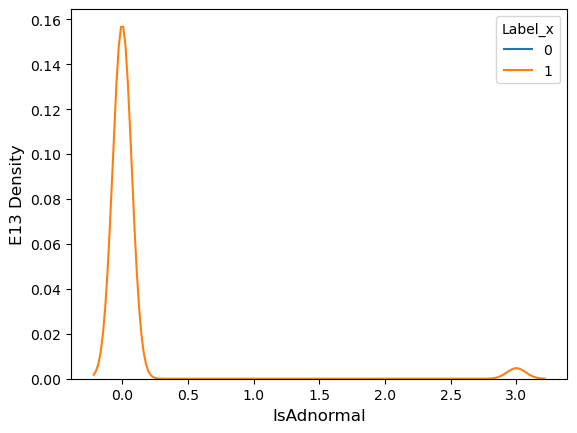

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


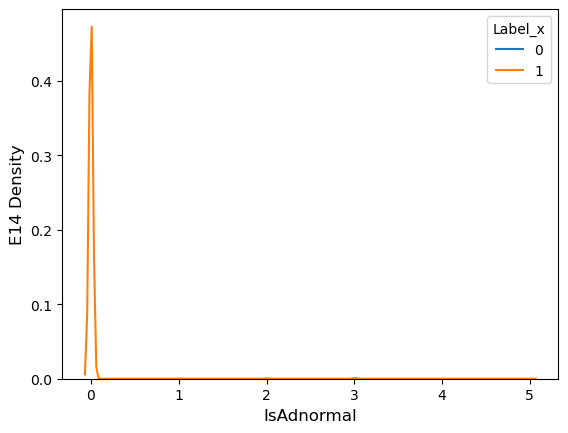

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


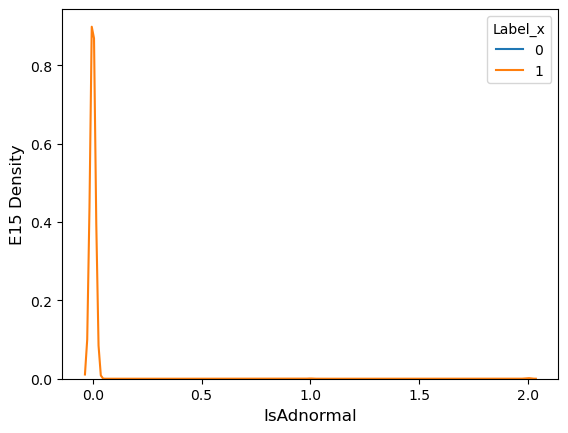

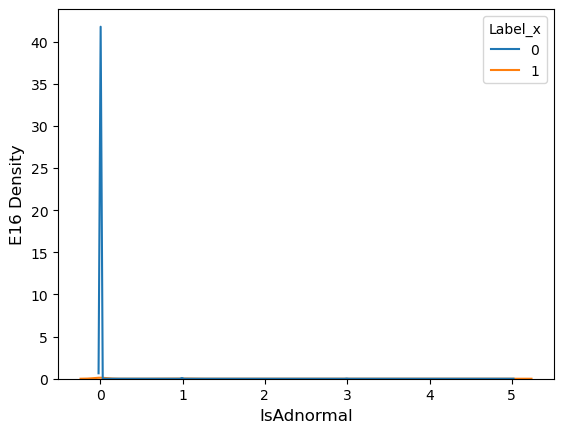

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


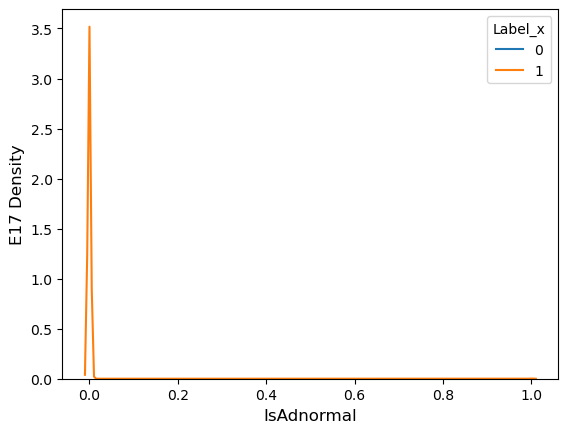

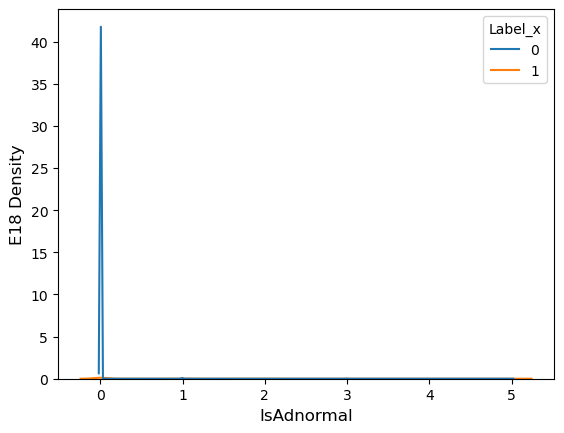

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


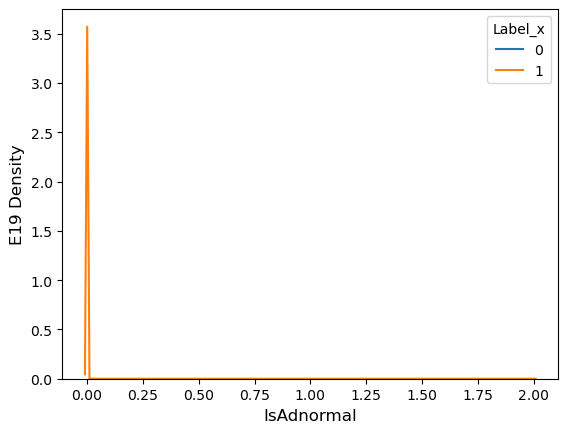

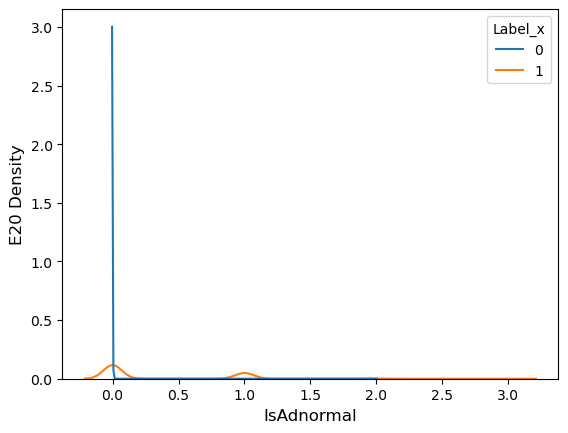

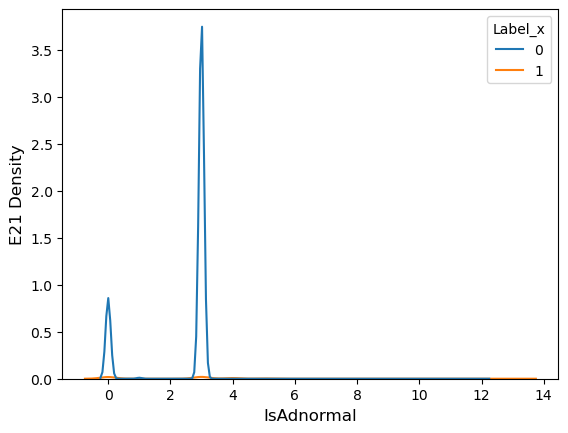

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


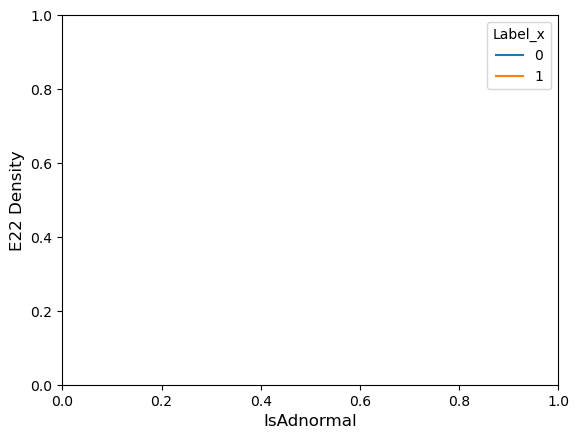

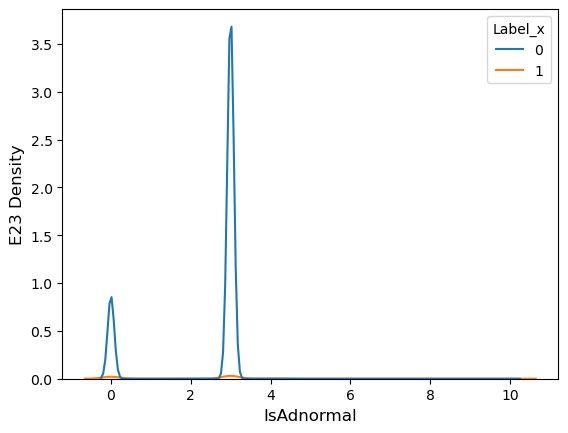

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


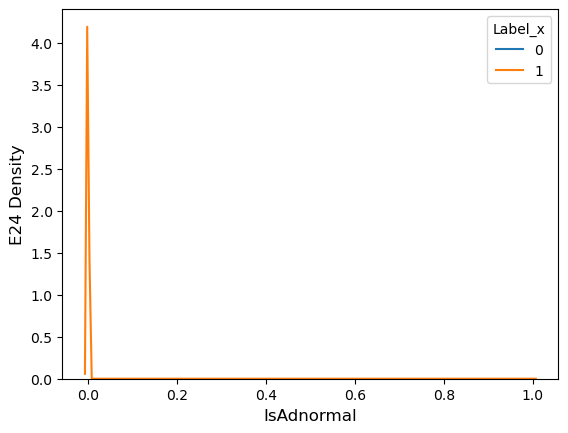

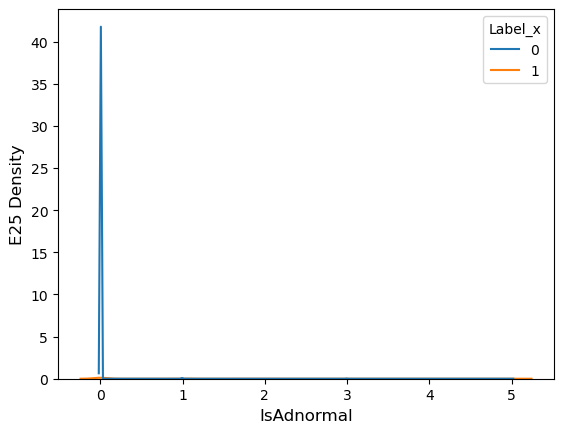

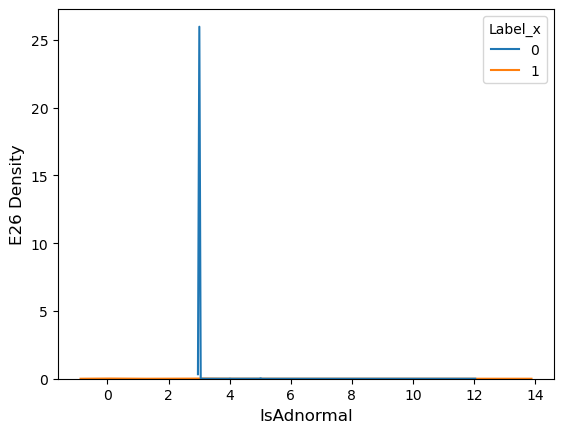

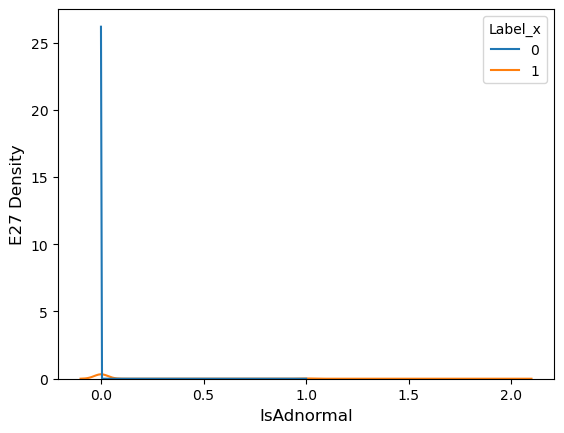

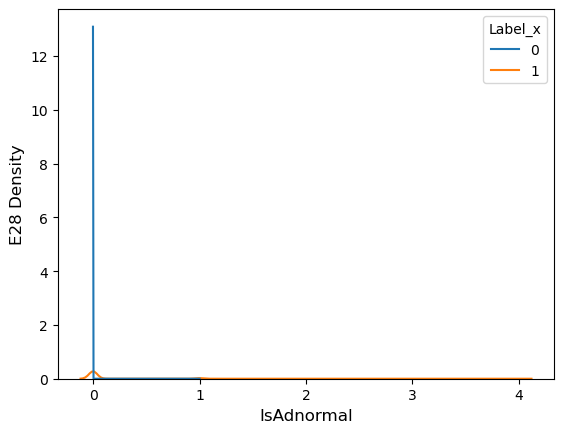

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_31588\836077734.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label_x')


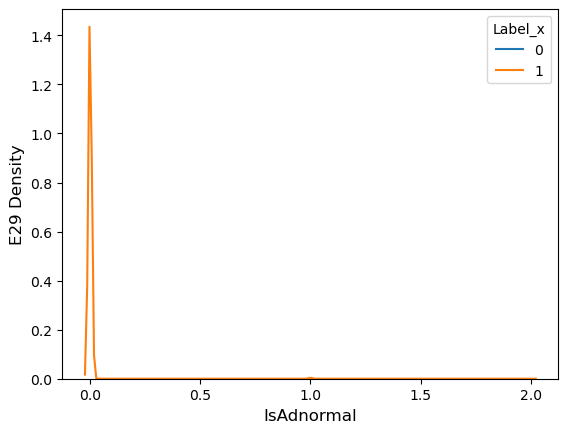

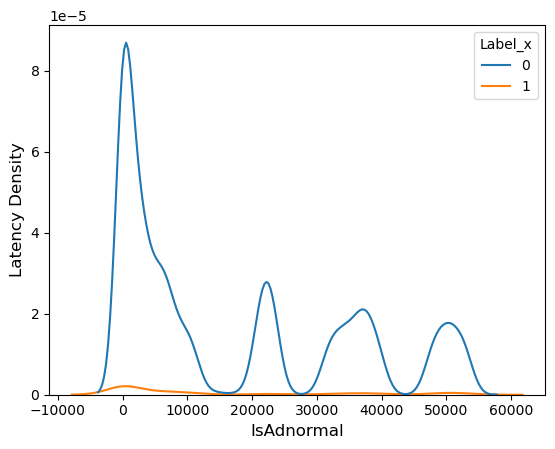

In [19]:
# Desity plot of the dataset

for col in v.columns:
    sns.kdeplot(data=v,x=col,hue='Label_x')
    plt.xlabel( "IsAdnormal" , size = 12 )
    plt.ylabel(col+" Density" , size = 12 )
    plt.show()

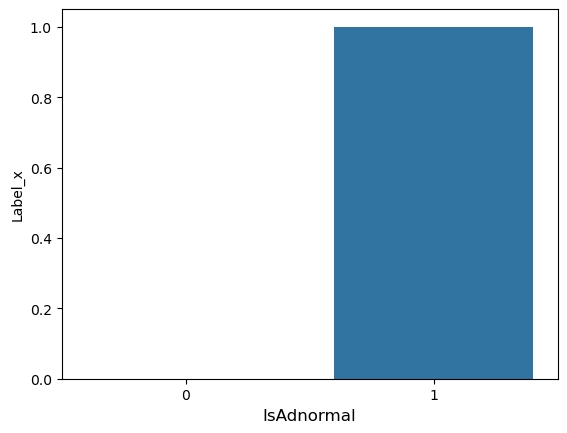

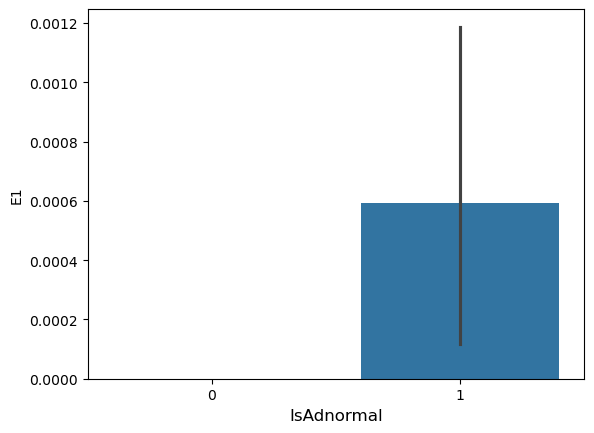

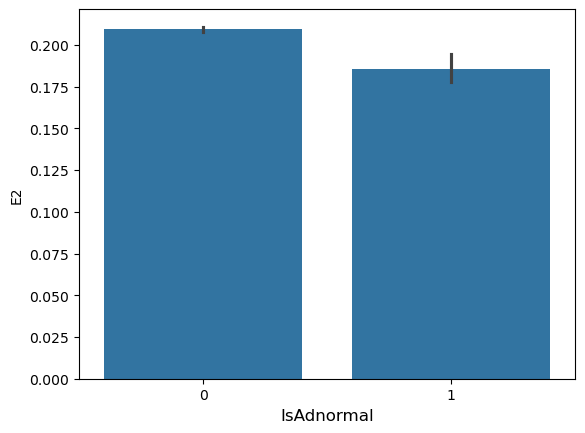

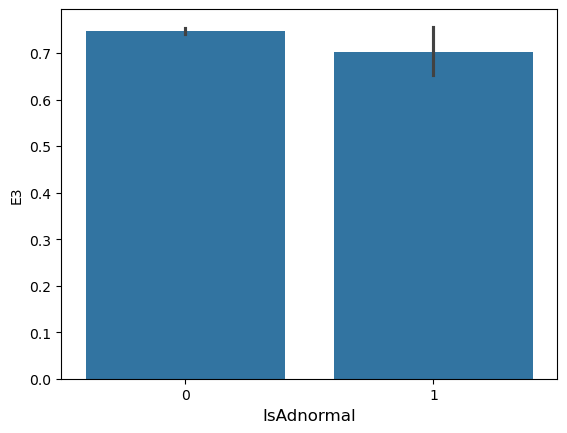

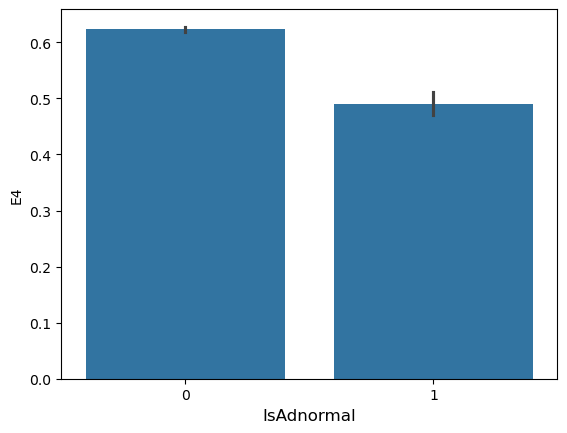

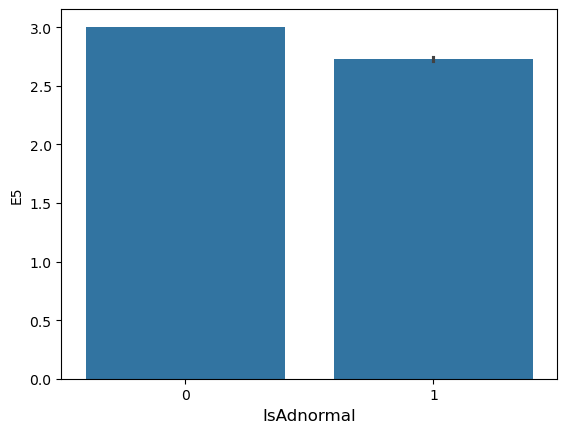

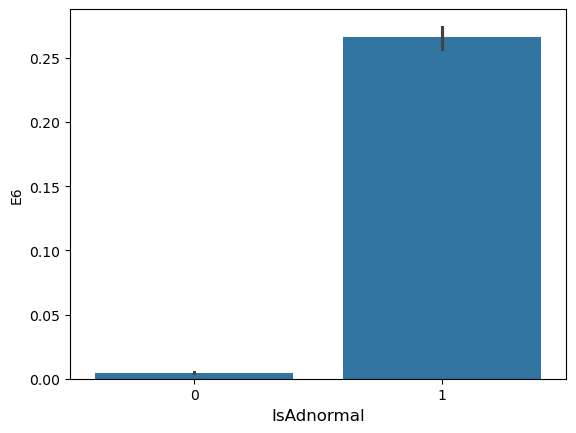

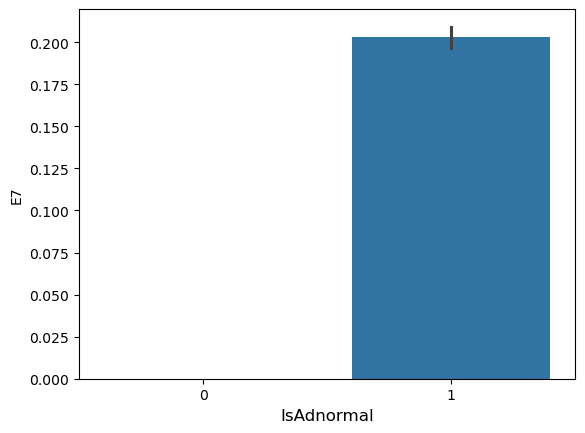

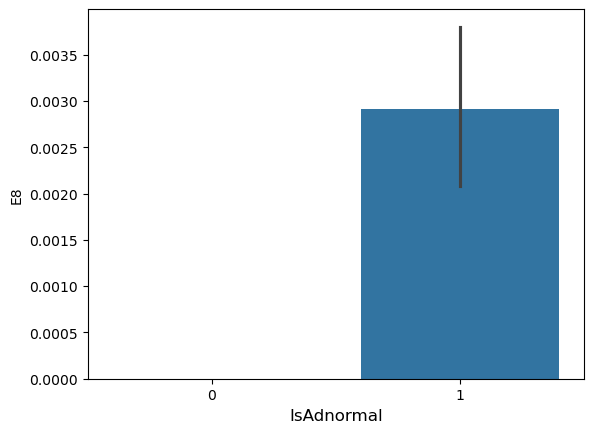

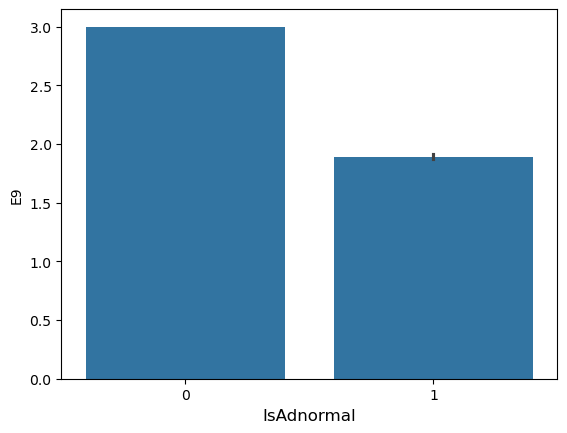

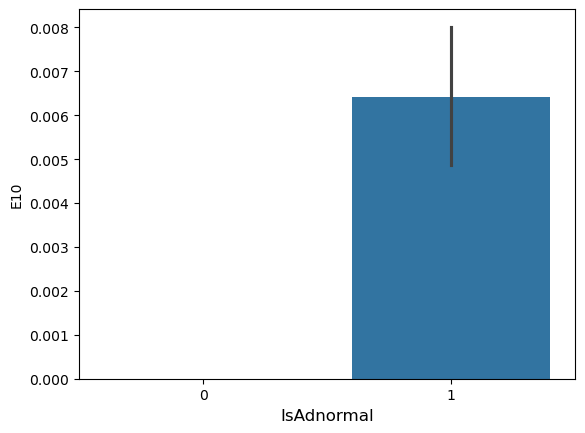

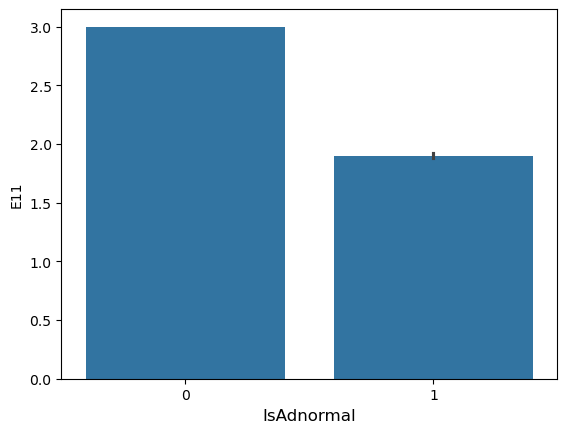

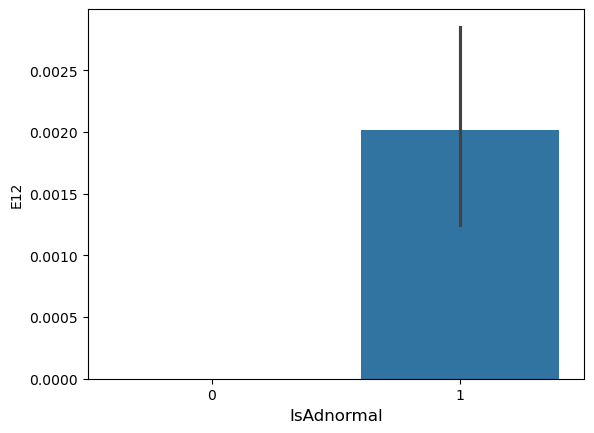

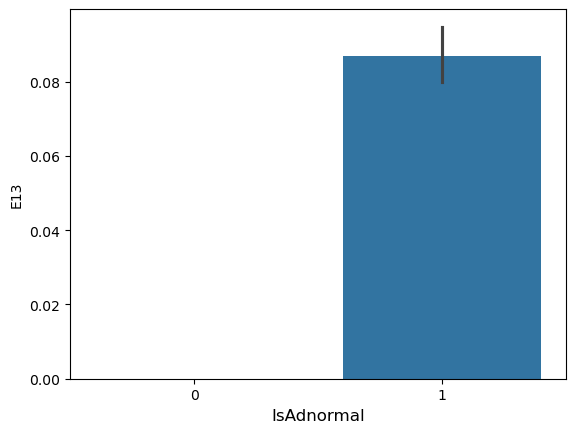

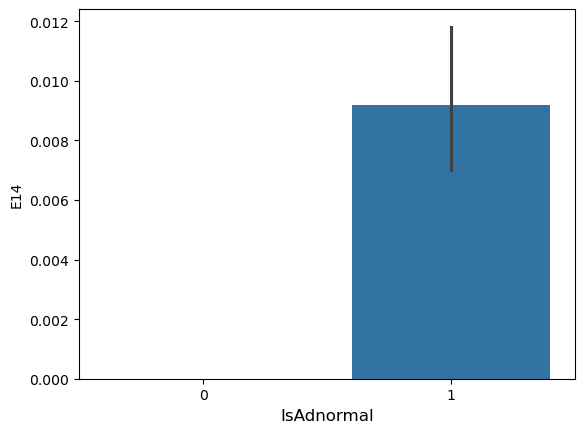

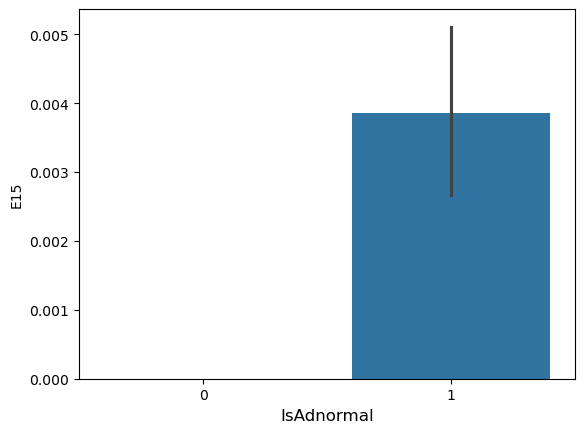

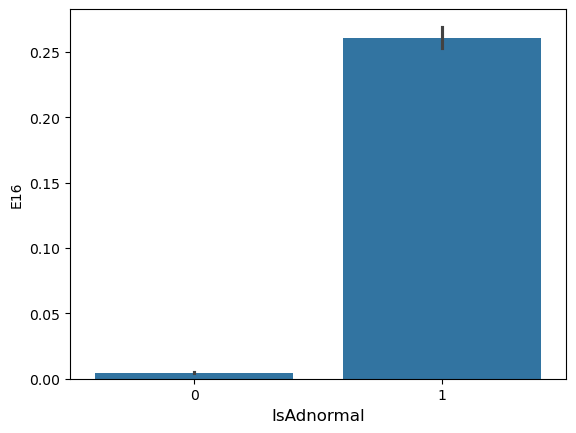

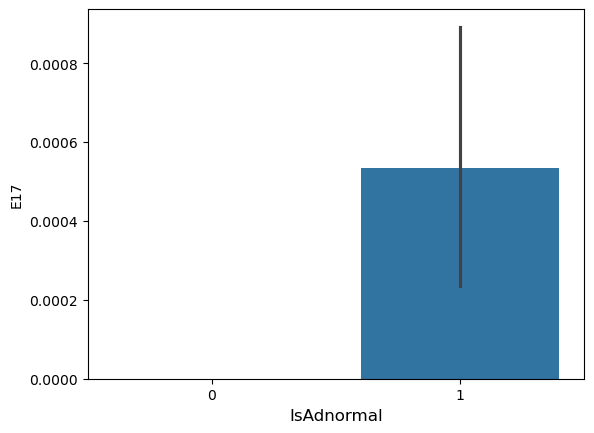

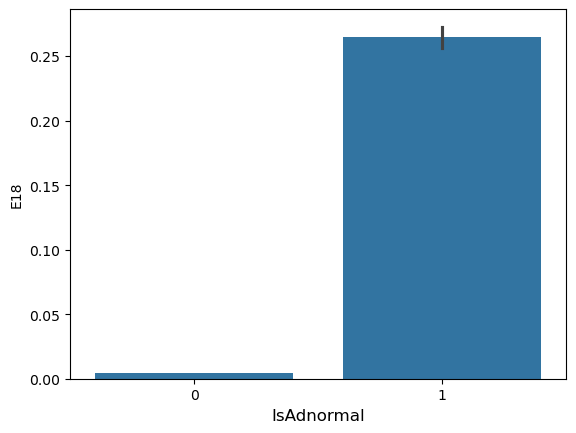

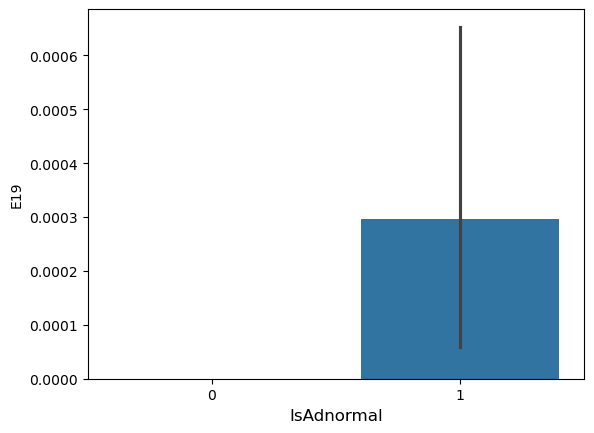

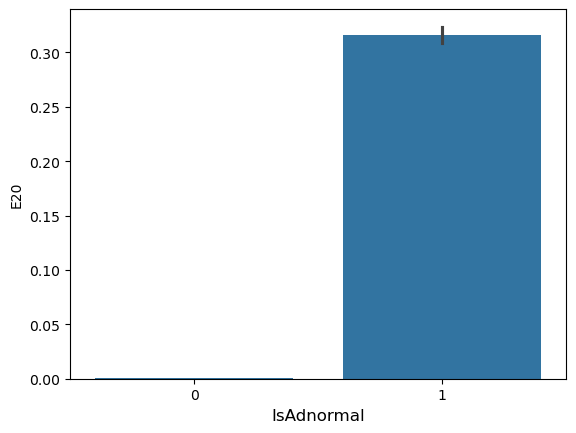

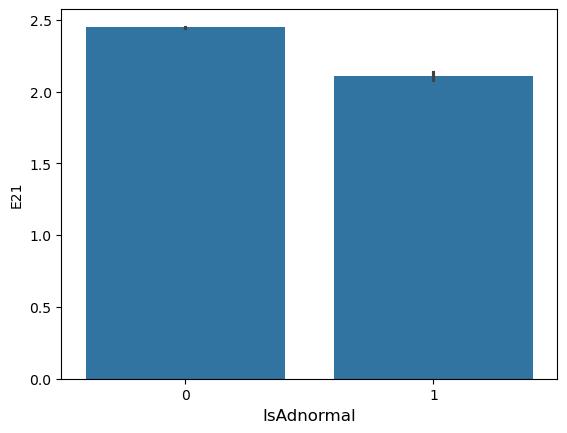

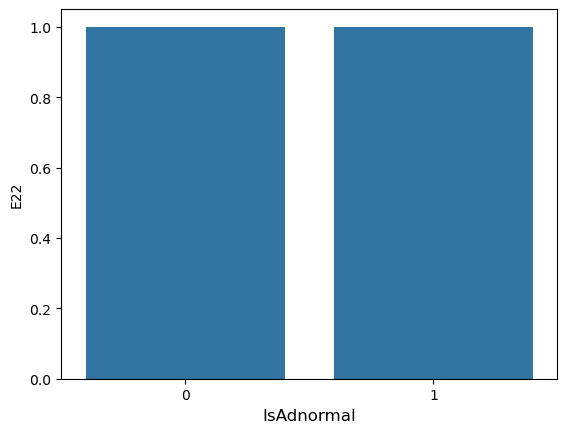

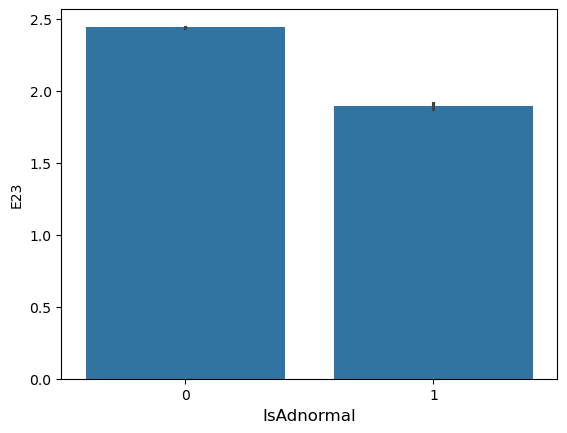

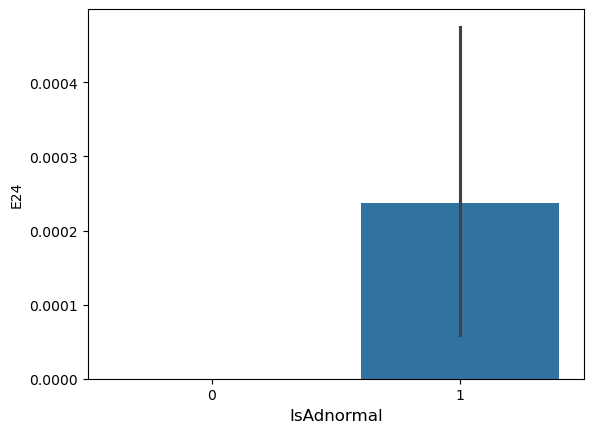

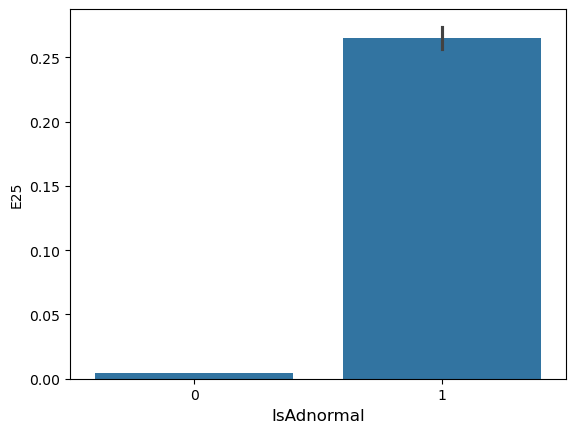

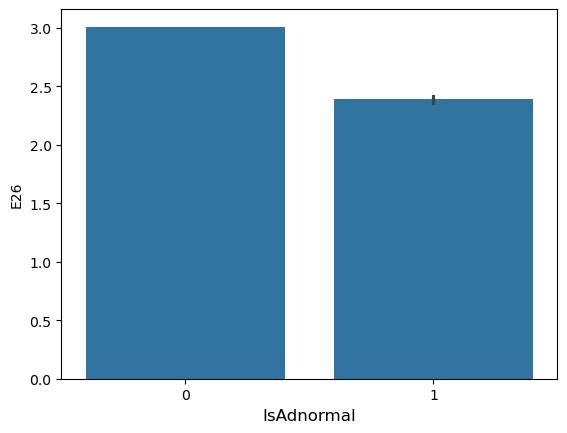

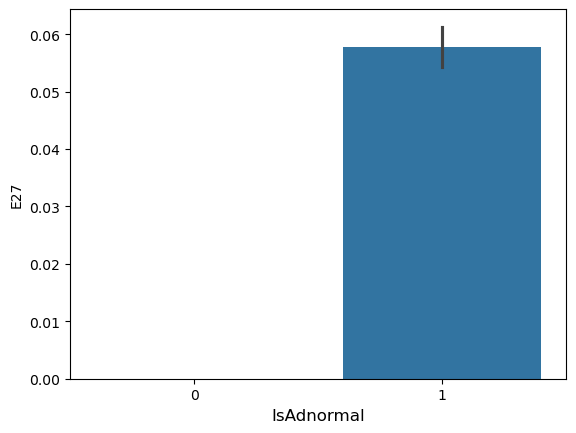

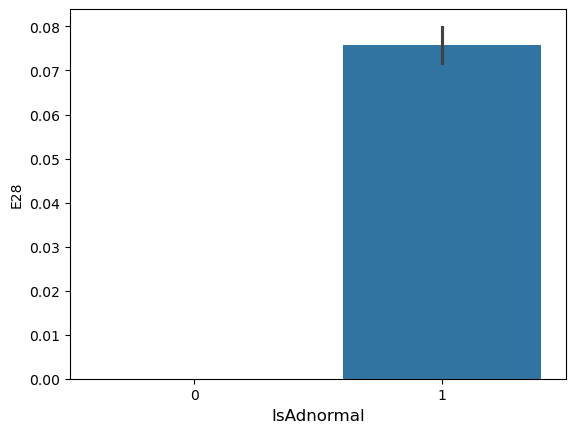

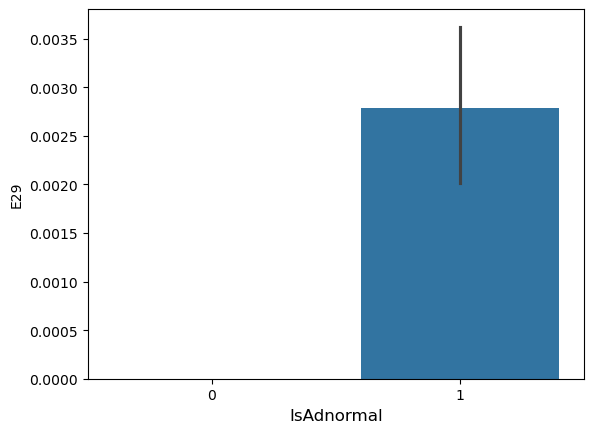

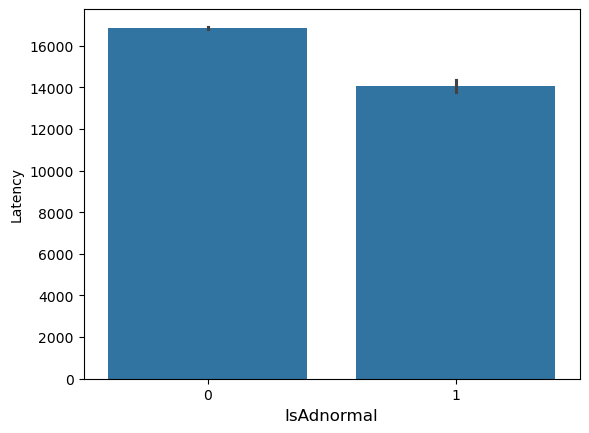

In [20]:
# Barplot of the dataset

for col in v.columns:
    sns.barplot(data=v,x='Label_x',y=col)
    plt.xlabel( "IsAdnormal" , size = 12 )
    plt.show()

## 3. Training the model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [22]:
x = occ_df.drop(['BlockId','Label_x'],axis=1)
y = occ_df.Label_x

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=33)

scaled = StandardScaler()
# xtrain = scaled.fit_transform(xtrain)

In [23]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(xtrain,ytrain)

D:\Y2S2\AI_IN_CYBER\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [24]:
predict = logmodel.predict(xtest)

## 3.1 Logistic Regression Model Performance

In [25]:
print('Confusion Matrix')
print(confusion_matrix(ytest,predict))
print('Classification Report')
print(classification_report(ytest,predict))

Confusion Matrix
[[110397   1214]
 [   189   3213]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    111611
           1       0.73      0.94      0.82      3402

    accuracy                           0.99    115013
   macro avg       0.86      0.97      0.91    115013
weighted avg       0.99      0.99      0.99    115013



## 3.2 Decision Tree Model Performance

In [26]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(xtrain, ytrain)
y_pred_tree = tree.predict(xtest)

print(confusion_matrix(ytest, y_pred_tree))
print(classification_report(ytest, y_pred_tree))

[[111593     18]
 [    15   3387]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    111611
           1       0.99      1.00      1.00      3402

    accuracy                           1.00    115013
   macro avg       1.00      1.00      1.00    115013
weighted avg       1.00      1.00      1.00    115013



### 3.3 Removing uncorrelated logs to check for impact on model performance

In [27]:
# Create correlation matrix
corr_matrix = occ_corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation less than 0.01
to_keep = ['Label_x']
for column in upper.columns:
    if any(upper[column] > 0.01) or any(upper[column] < -0.01):
        to_keep.append(column)

m = occ_df[to_keep]

In [28]:
m.head()

,Label_x,E1,E3,E4,E5,E6,E7,E8,E9,E10,...,E20,E21,E23,E24,E25,E26,E27,E28,E29,Latency
0,0,0,203,0,10,7,0,0,3,0,...,0,10,10,0,4,10,0,0,0,3802
1,0,0,1,0,3,0,0,0,3,0,...,0,3,3,0,0,3,0,0,0,3802
2,1,0,203,0,3,0,0,0,3,0,...,1,3,3,0,0,3,0,0,0,3797
3,0,0,0,0,3,0,0,0,3,0,...,0,3,3,0,0,3,0,0,0,50448
4,0,0,1,15,3,0,0,0,3,0,...,0,3,3,0,0,3,0,0,0,50583


#### Checking for performance impact to the model

In [29]:
x = m.drop(['Label_x'],axis=1)
y = m.Label_x

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=33)

scaled = StandardScaler()
# xtrain = scaled.fit_transform(xtrain)

In [30]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(xtrain,ytrain)

D:\Y2S2\AI_IN_CYBER\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [31]:
predict = logmodel.predict(xtest)

In [32]:
print('Confusion Matrix')
print(confusion_matrix(ytest,predict))
print('Classification Report')
print(classification_report(ytest,predict))

Confusion Matrix
[[111193    418]
 [   305   3097]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    111611
           1       0.88      0.91      0.90      3402

    accuracy                           0.99    115013
   macro avg       0.94      0.95      0.95    115013
weighted avg       0.99      0.99      0.99    115013



In [33]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(xtrain, ytrain)
y_pred_tree = tree.predict(xtest)

print(confusion_matrix(ytest, y_pred_tree))
print(classification_report(ytest, y_pred_tree))

[[111592     19]
 [    15   3387]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    111611
           1       0.99      1.00      1.00      3402

    accuracy                           1.00    115013
   macro avg       1.00      1.00      1.00    115013
weighted avg       1.00      1.00      1.00    115013



Data shows negligible improvement for the Decision tree model and a improvement for the logistic prediction model

## 4.HDFS V2 logs

In [77]:
import os

hdfs2_folder = './HDFS_v2_node_logs'
hdfs2_csv_folder = hdfs2_folder + '/hdfsv2_csv'

hdfs2_files = [a for a in os.listdir(hdfs2_folder) if '.log' in a]


#### 4.1 Reading the raw log to prepare transformation step to dataframe

In [78]:
with open(hdfs2_folder+'/'+hdfs2_files[9], 'r') as hd:
    h2_raw = hd.readlines()

for k in h2_raw[:30]:
    print(k)

2015-08-21 11:16:04,272 INFO org.apache.hadoop.hdfs.server.datanode.DataNode: STARTUP_MSG: 

/************************************************************

STARTUP_MSG: Starting DataNode

STARTUP_MSG:   host = mesos-slave-11/10.10.34.21

STARTUP_MSG:   args = []

STARTUP_MSG:   version = 2.7.1

STARTUP_MSG:   classpath = /usr/local/hadoop/etc/hadoop:/usr/local/hadoop/share/hadoop/common/lib/curator-recipes-2.7.1.jar:/usr/local/hadoop/share/hadoop/common/lib/jsp-api-2.1.jar:/usr/local/hadoop/share/hadoop/common/lib/curator-framework-2.7.1.jar:/usr/local/hadoop/share/hadoop/common/lib/apacheds-kerberos-codec-2.0.0-M15.jar:/usr/local/hadoop/share/hadoop/common/lib/jackson-xc-1.9.13.jar:/usr/local/hadoop/share/hadoop/common/lib/netty-3.6.2.Final.jar:/usr/local/hadoop/share/hadoop/common/lib/jetty-6.1.26.jar:/usr/local/hadoop/share/hadoop/common/lib/asm-3.2.jar:/usr/local/hadoop/share/hadoop/common/lib/slf4j-api-1.7.10.jar:/usr/local/hadoop/share/hadoop/common/lib/junit-4.11.jar:/usr/local/

#### 4.2 Parsing and seperating the different columns using Regex

In [79]:
# Seperating the logs into the format Date,Time,Level, Component, Content
df_raw = pd.DataFrame(h2_raw[10:], columns=['raw_log'])

regex_pattern = r'^(?P<Date>\d{4}-\d{2}-\d{2})\s+(?P<Time>\d{2}:\d{2}:\d{2},\d{3})\s+(?P<Level>[A-Z]+)\s+(?P<Component>[\w\.]+):\s+(?P<Content>.*)$'

df_base = df_raw['raw_log'].str.extract(regex_pattern)
# Checking if the data was formatted properly
df_base.head()

,Date,Time,Level,Component,Content
0,2015-08-21,"11:16:04,290",INFO,org.apache.hadoop.hdfs.server.datanode.DataNode,"registered UNIX signal handlers for [TERM, HUP..."
1,2015-08-21,"11:16:05,751",INFO,org.apache.hadoop.metrics2.impl.MetricsConfig,loaded properties from hadoop-metrics2.properties
2,2015-08-21,"11:16:05,858",INFO,org.apache.hadoop.metrics2.impl.MetricsSystemImpl,Scheduled snapshot period at 10 second(s).
3,2015-08-21,"11:16:05,858",INFO,org.apache.hadoop.metrics2.impl.MetricsSystemImpl,DataNode metrics system started
4,2015-08-21,"11:16:05,865",INFO,org.apache.hadoop.hdfs.server.datanode.BlockSc...,Initialized block scanner with targetBytesPerS...


#### 4.3 Exploring the data

In [80]:
# Checking for null values
print(df_base.isnull().sum())

Date         497245
Time         497245
Level        497245
Component    497245
Content      497245
dtype: int64


In [81]:
# Drop any null values
df_base = df_base.dropna()

In [82]:
# Exploring the data that can be changed
print('HDFSv2 Shape:')
print(df_base.shape,end='\n\n')
print('HDFSv2 Describe:')
print(df_base.describe(),end='\n\n')
print('HDFSv2 Info:')
print(df_base.info(),end='\n\n')

HDFSv2 Shape:
(1260151, 5)

HDFSv2 Describe:
              Date          Time    Level  \
count      1260151       1260151  1260151   
unique         606        692642        3   
top     2016-10-06  22:38:40,957     INFO   
freq        151467           129  1241251   

                                              Component  \
count                                           1260151   
unique                                               19   
top     org.apache.hadoop.hdfs.server.datanode.DataNode   
freq                                             482039   

                            Content  
count                       1260151  
unique                      1052465  
top     IOException in offerService  
freq                          18412  

HDFSv2 Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1260151 entries, 0 to 1757395
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Date       1260151 non-null  object

#### 4.4 Checking if previous eventID format can be used

In [83]:
import re

pandas_list[3]['regex_pattern'] = (
    pandas_list[3]['EventTemplate']
    .str.replace(']', '', regex=False)
    .str.replace('[', '', regex=False)
    .str.replace('*', '(.*?)', regex=False)
)

combined_regex_str = "|".join([f"(?P<{eid}>{pat})" for eid, pat in zip(pandas_list[3]['EventId'], pandas_list[3]['regex_pattern'])])
combined_pattern = re.compile(combined_regex_str)

# Function to get the event ID
def get_event_id_fast(content):
    match = combined_pattern.search(content)
    if match:
        return match.lastgroup
    return None

df_base['EventId'] = df_base['Content'].apply(get_event_id_fast)

KeyboardInterrupt: 

In [ ]:
from multiprocessing import Pool, cpu_count

def parallelize_dataframe(df, func, n_cores=None):
    if n_cores is None:
        n_cores = cpu_count()
    # Split dataframe into chunks
    df_split = np.array_split(df, n_cores)
    with Pool(n_cores) as pool:
        df = pd.concat(pool.map(func, df_split))
    return df

def run_on_subset(subset):
    subset['EventId'] = subset['Content'].apply(get_event_id_fast)
    return subset


df_base = parallelize_dataframe(df_base, run_on_subset,3)

#### 4.5 Checking if event id from HDFSv3 can be used in this scenario

With there being no values in the column for event id , it suggests that it uses a different event id

In [ ]:
eid_dd = pd.read_json('./HDFS_v3_preprocessed/eventId.json')
eid_dd.columns = ['Pattern','ID']

In [ ]:
# pd.set_option('display.max_colwidth',1000)
eid_dd.head()

In [ ]:
# Creating a regex function to replace the placeholders for variables with regex
import re

def create_regex_safe(text):
    pattern = re.escape(text)
    pattern = re.sub(r'blk_[\\\-\d]+', lambda _: r'blk_[\-\d]+', pattern)
    pattern = re.sub(r'@[a-f0-9]+', lambda _: r'@[a-f0-9]+', pattern)
    pattern = re.sub(r'\\/[\w\\/]+', lambda _: r'/[^:\s]+', pattern)
    pattern = pattern.replace(r'\+', r'\s*\+\s*')
    return f"^{pattern}.*"

eid_dd['regex_pattern'] = eid_dd['Pattern'].apply(create_regex_safe)

In [ ]:
# create a matching function to match to the responding event ID
patterns = [fr"(?P<idx{row.ID}>{row.regex_pattern})" for row in eid_dd.itertuples()]
combined_regex = re.compile("|".join(patterns))


def get_eid_from_content(content):
    if not content or pd.isna(content):
        return None
    
    # combined_regex is now defined globally above
    match = combined_regex.search(content)
    if match:
        group_name = match.lastgroup
        return int(group_name.replace('idx', ''))
    return None


In [ ]:
df_base['EID'] = df_base['Content'].apply(get_eid_from_content)

print(df_base[['Content', 'EID']].head())

#### 4.6 Checking if event id from HDFSv3 can be used in this scenario

In this scenario, we try to identify the different types of logs through data processing and use the best of our knowledge to clean logs. In this case we try to use regex to identify common patterns. However with that the data is not labelled and require some form of manual inspection. The data is only good for providing a baseline of what is good.

In [ ]:
unknown_logs = df_base['Content'].unique()
print(f"Number of unique unknown log patterns: {len(unknown_logs)}")

### 4.7 Using regex to create a template mask

In [ ]:
# Creates a template based on the unique values and tries to reduce it
def get_template_mask(content):
    if not isinstance(content, str): return None

    mask = re.sub(r'blk_-?\d+', '<BLOCK_ID>', content)
    mask = re.sub(r'\d+', '<NUM>', mask)
    mask = re.sub(r'/[a-zA-Z0-9/._-]+', '<PATH>', mask)
    
    return mask

# Apply masking to unknown logs
unknown_df = pd.DataFrame(unknown_logs, columns=['Content'])
unknown_df['Template_Mask'] = unknown_df['Content'].apply(get_template_mask)

In [97]:
# Trying to add counts to the events to prioritise events
new_potential_events = pd.DataFrame(unknown_df['Template_Mask'].value_counts())
new_potential_events = new_potential_events.reset_index()
new_potential_events.columns = ['Event', 'Count']

print(new_potential_events.tail())

                                                                                                                                                                                                                                                                                                                      Event  \
2335                                                                                                                                                                                              Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFilter) to context static   
2336                                                                                                                                                                                                Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFilter) to context logs   
2337                                       

In [70]:
def get_signature(content):
    
    return " ".join(str(content).split()[:4])

unknown_df['Signature'] = df_base['Content'].apply(get_signature)
discovered_events = unknown_df.groupby('Signature')['Content'].first()

discovered_events.head()

Signature
Acknowledging ACTIVE Namenode Block                                                                        VolumeScanner(/tmp/hadoop-hdfs/dfs/data, DS-9e42e490-1f2a-4aeb-923b-5fdb17af061f): no suitable block pools found to scan.  Waiting 1814399871 ms.
Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFilter)                          Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFilter) to context datanode
Added global filter 'safety'                                                                                                                                      Added global filter 'safety' (class=org.apache.hadoop.http.HttpServer2$QuotingInputFilter)
Added new volume: DS-195b1adf-7b35-4755-810b-79326b3c20e7                                                                   PacketResponder: BP-108841162-10.10.34.11-1440074360971:blk_1073744157_3333, type=LAST_IN_PIPELINE, downstr

## 5. HDFSv3 logs

HDFSv3 included a preprocessed of the normal and adnormal logs as a csv, with the raw logs stored as sql database. with the number of unique event ids being as high as 2155, it is a step higher than the first HDFS logs where there were only 30 event ids provided.

### 5.1 Initalising the available logs in HDFSv3

In [34]:
#  Importing the dataset

import os

hdfs3_folder = './HDFS_v3_preprocessed'
hdfs3_files = [a for a in os.listdir(hdfs3_folder) if '.json' in a or '.csv' in a]

print(f'Files in hdfs3_folder:')
for a in hdfs3_files:
    print('-',a)

Files in hdfs3_folder:
- eventId.json
- failure_taskId.json
- failure_trace.csv
- normal_taskId.json
- normal_trace.csv
- rowNumberResult.csv


In [35]:
# Initalising the dataframes
hdfs3_dfs = []
for a in hdfs3_files:
    if '.json' in a:
        hdfs3_dfs.append(pd.read_json(hdfs3_folder+'/'+a))
    elif '.csv' in a:
        hdfs3_dfs.append(pd.read_csv(hdfs3_folder+'/'+a))

### 5.2 Exploring the available datasets

In [36]:
# exploring the datasets heads

for b,e in enumerate(hdfs3_dfs):
    print(b, hdfs3_files[b])
    print(e.head())

0 eventId.json
                                                   0  1
0  getFileInfo+success: return(ow[class=class org...  0
1  RPC:getFileInfo+success: return(ow[class=class...  1
2  getBlockLocations+success: return(ow[class=cla...  2
3  RPC:getBlockLocations+success: return(ow[class...  3
4    bestNode+success: chosen bestnode = in nodes =   4
1 failure_taskId.json
                  0  1
0  B076E6516B275ABB  0
1  A8DFB1AFB3AF3645  1
2  E5E74A5B2CB7ED61  2
3  07484C540CA975EF  3
4  4FBE4C9F5C6D353D  4
2 failure_trace.csv
             TaskID  \
0  A3D866C198394B6C   
1  8B454C795004383B   
2  E98D8C43C4DAB01E   
3  F92E1122370550F0   
4  DA7494446C39DF7A   

   getFileInfo+success: return(ow[class=class org.apache.hadoop.hdfs.protocol.hdfsfilestatus  \
0                                                4.0                                           
1                                                4.0                                           
2                                         

In [37]:
# exploring the descriptions of the datasets
for b,e in enumerate(hdfs3_dfs):
    print(b, hdfs3_files[b])
    print('Size of dataset:',e.shape)
    print('Database describe:', e.describe())
    print('Database info:', e.info())
    print('Empty values:', e.isna().sum())

0 eventId.json
Size of dataset: (2155, 2)
Database describe:                  1
count  2155.000000
mean   1077.000000
std     622.239236
min       0.000000
25%     538.500000
50%    1077.000000
75%    1615.500000
max    2154.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2155 non-null   object
 1   1       2155 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.8+ KB
Database info: None
Empty values: 0    0
1    0
dtype: int64
1 failure_taskId.json
Size of dataset: (143556, 2)
Database describe:                    1
count  143556.000000
mean    71777.500000
std     41441.191959
min         0.000000
25%     35888.750000
50%     71777.500000
75%    107666.250000
max    143555.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143556 entries, 0 to 143555
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 


In [38]:
# exploring the shape of the data and checking for null values

print('Dataframe shape:')

for b,e in enumerate(hdfs3_dfs):
    print(b,hdfs3_files[b],e.shape)

print('\nNull data:')

for b,e in enumerate(hdfs3_dfs):
    print(b,hdfs3_files[b])
    print(e.isna().sum(),end='\n\n')

Dataframe shape:
0 eventId.json (2155, 2)
1 failure_taskId.json (143556, 2)
2 failure_trace.csv (29817, 2156)
3 normal_taskId.json (226767, 2)
4 normal_trace.csv (226767, 2156)
5 rowNumberResult.csv (363, 5)

Null data:
0 eventId.json
0    0
1    0
dtype: int64

1 failure_taskId.json
0    0
1    0
dtype: int64

2 failure_trace.csv
TaskID                                                                                                                                                                                                      0
getFileInfo+success: return(ow[class=class org.apache.hadoop.hdfs.protocol.hdfsfilestatus                                                                                                                   0
RPC:getFileInfo+success: return(ow[class=class org.apache.hadoop.hdfs.protocol.hdfsfilestatus                                                                                                               0
getBlockLocations+success: return(ow[class=class 

In [39]:
# Checking for duplicates in the dataset
print('\nDuplicated data:')

for b,e in enumerate(hdfs3_dfs):
    print(b,hdfs3_files[b])
    print(e.duplicated().sum(),end='\n\n')


Duplicated data:
0 eventId.json
0

1 failure_taskId.json
0

2 failure_trace.csv
0

3 normal_taskId.json
0

4 normal_trace.csv
0

5 rowNumberResult.csv
0



### 5.3 Selecting one Dataframe to build on

Looking at the available datasets, it appears that the EventId.json contains all of the eventId. In addition, it appears that the columns in the failure_trace.csv and the normal_trace.csv contain the events, but not formatted to match the event ids.

There appears to be a difference between the number of failures identified and failures traced.

Currently, it seems that the failure logs is seperated from the normal logs, and a need to combine the two dataframes together before training

In [40]:
# initalising dataframes to focus on
rule_df = hdfs3_dfs[0]
fail_df = hdfs3_dfs[2]
norm_df = hdfs3_dfs[4]

In [41]:
# Renaming the columns to match those found in 
mapping_dict = dict(zip(rule_df.iloc[:, 0], rule_df.iloc[:, 1]))

norm_df.rename(columns=mapping_dict, inplace=True)
fail_df.rename(columns=mapping_dict, inplace=True)

In [42]:
# Check if it is done
print('Normal logs:\n',norm_df.columns)
print('\nFailed logs:\n',fail_df.columns)

Normal logs:
 Index(['TaskID',        0,        1,        2,        3,        4,        5,
              6,        7,        8,
       ...
           2145,     2146,     2147,     2148,     2149,     2150,     2151,
           2152,     2153,     2154],
      dtype='object', length=2156)

Failed logs:
 Index(['TaskID',        0,        1,        2,        3,        4,        5,
              6,        7,        8,
       ...
           2145,     2146,     2147,     2148,     2149,     2150,     2151,
           2152,     2153,     2154],
      dtype='object', length=2156)


In [43]:
# checking if there is any duplicates before actually merging the datasets
print(pd.concat([norm_df,fail_df]).duplicated().sum())

# assigning value to failed and normal events
norm_df['Rate'] = 0
fail_df['Rate'] = 1

0


In [44]:
# Merging the two datasets together
sum_df = pd.concat([norm_df,fail_df])

In [45]:
# Exporting dataset to a known file
sum_df.to_csv('hdfs3_final.csv')

### 5.4 Data Exploration

In [46]:
sum_df.head()

,TaskID,0,1,2,3,4,5,6,7,8,...,2146,2147,2148,2149,2150,2151,2152,2153,2154,Rate
0,C47C9A2D664ACF66,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2525398BEF2D756B,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,8F758E6FAF80F711,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,A44931922B99D07C,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5B7F82CA0EEB7A1A,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### 5.5 Heatmap of the dataframe

In [47]:
# Creating a correlation graph
sum_corr = sum_df.corr(numeric_only=True)
sum_corr.to_csv('matrix.csv')
# Alternative, But might not be stable

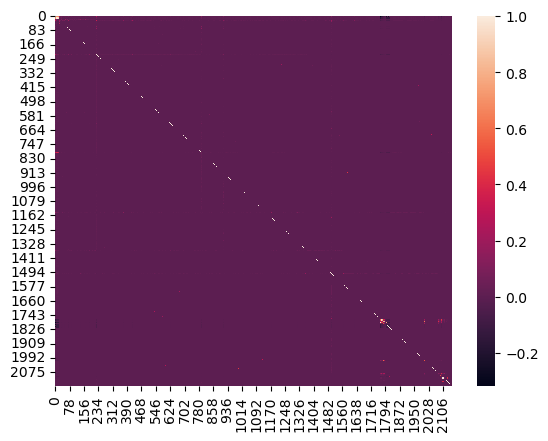

In [48]:
sns.heatmap(sum_corr)
plt.show()

In [49]:
print('Log Size:',sum_df.shape)
# print('Describe:',total_logs.describe()) # Unable to due to memory constraints
print('Info:',sum_df.info())
print('Empty cells:',sum_df.isna().sum())


Log Size: (256584, 2157)
<class 'pandas.core.frame.DataFrame'>
Index: 256584 entries, 0 to 29816
Columns: 2157 entries, TaskID to Rate
dtypes: float64(2155), int64(1), object(1)
memory usage: 4.1+ GB
Info: None
Empty cells: TaskID    0
0         0
1         0
2         0
3         0
         ..
2151      0
2152      0
2153      0
2154      0
Rate      0
Length: 2157, dtype: int64


## 6. Training models on Decision tree and LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
# declaring some var
scaled = StandardScaler()
tree = DecisionTreeClassifier(max_depth=5)

train_df = sum_df

# splitting data
x = train_df.drop(['TaskID','Rate'],axis=1)
y = train_df.Rate
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=33)

# Training data
tree.fit(xtrain, ytrain)
y_pred_tree = tree.predict(xtest)

# Testing data
print(confusion_matrix(ytest, y_pred_tree))
print(classification_report(ytest, y_pred_tree))

[[45391     0]
 [  416  5510]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     45391
           1       1.00      0.93      0.96      5926

    accuracy                           0.99     51317
   macro avg       1.00      0.96      0.98     51317
weighted avg       0.99      0.99      0.99     51317



In [52]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(xtrain,ytrain)

predictc = logmodel.predict(xtest)

In [53]:
print('Confusion Matrix')
print(confusion_matrix(ytest,predictc))
print('Classification Report')
print(classification_report(ytest,predictc))

Confusion Matrix
[[45387     4]
 [    1  5925]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45391
           1       1.00      1.00      1.00      5926

    accuracy                           1.00     51317
   macro avg       1.00      1.00      1.00     51317
weighted avg       1.00      1.00      1.00     51317



### 6.1 Refining the data and removing columns with almost no correlation

As shown in the heatmap graph, most of the columns have low correlations between each other and between faliures and normal processes, while there being still hotspots of correlation. To reduce the power and increase efficiency, we can run and test our model to check if there is any performance gain or impact from reducing the amount of columns.

In [72]:
# Create correlation matrix
corr_matrix = sum_corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation less than 0.01
to_keep = []
for column in upper.columns:
    if any(upper[column] > 0.1) or any(upper[column] < -0.1):
        to_keep.append(column)
if 'Rate' not in to_keep: to_keep.append('Rate')
m = sum_df[to_keep]

In [73]:
len(to_keep)

413

### 6.1 Performance Evaluation

In [74]:
# declaring some var
scaled = StandardScaler()
tree = DecisionTreeClassifier(max_depth=5)

train_df = m

# splitting data
x = train_df.drop(['Rate'],axis=1)
y = train_df.Rate
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=33)

# Training data
tree.fit(xtrain, ytrain)
y_pred_tree = tree.predict(xtest)

# Testing data
print(confusion_matrix(ytest, y_pred_tree))
print(classification_report(ytest, y_pred_tree))

[[45391     0]
 [  417  5509]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     45391
           1       1.00      0.93      0.96      5926

    accuracy                           0.99     51317
   macro avg       1.00      0.96      0.98     51317
weighted avg       0.99      0.99      0.99     51317



In [75]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(xtrain,ytrain)

predictc = logmodel.predict(xtest)

In [76]:
print('Confusion Matrix')
print(confusion_matrix(ytest,predictc))
print('Classification Report')
print(classification_report(ytest,predictc))

Confusion Matrix
[[45387     4]
 [    0  5926]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45391
           1       1.00      1.00      1.00      5926

    accuracy                           1.00     51317
   macro avg       1.00      1.00      1.00     51317
weighted avg       1.00      1.00      1.00     51317



Performance after getting the variables suggests that it performs better after reducing the number of columns. However, the data shows that the performance gain might be minute since is only reduces it by a small amount. However, this helps to reduce the copute resources and time needed.

In the logmodel report, we can see that there is still a minimal gain in the score of the model, which suggests that removing columns with almost 0 correlation can still affect the model.